In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import itertools
import scipy.special
import seaborn as sns

In [2]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Probability

At its most basic, determing the probability of things comes down to correctly
defining the sample space and possible events in the space, then correctly
counting the ways that events of interest can occur.

## Sample Space

The set of all possible outcomes of a statistical experiment is called the
**sample space** and is represented by the symbol $S$.

Each outcome in a sample space is called an **element** or simply a **sample point**.
For example, the sample space $S$ of possible outcomes for a coin flip
experiment may be written as:

\begin{equation}
S = \{H, T\}
\end{equation}

The sample space $S$ of possible outcomes for throwing a 6 sided dice is:

\begin{equation}
S = \{1, 2, 3, 4, 5, 6 \}
\end{equation}


## Events

An event is a subset of the possible outcomes of a sample space.  So for
a coin flip, one event is that a head $H$ occurs.  For a 6 sided dice,
an example of an event is that we roll a $1$.  Or as a slightly more
complex example of a subset, we could talk about the event of rolling
an even number $E = \{2, 4, 6 \}$

A few more quick concepts.  It is useful to think of events in a
sample space in terms of sets.  The **complement** of an event
$A$ is with respect to some larger set $S$.  So
for example, the complement of the event $E = \{2, 4, 6 \}$
of rolling an even number for a dice with sample space
$S = \{1, 2, 3, 4, 5, 6 \}$ is $E' = \{1, 3, 5\}$
We use the notation $E'$ to represent the complement of $E$.

We can also talk about the intersection and union of events.  If
two events are **mutually exclusive** or **disjoint** then their
intersection is the empty set $A \cap B = \emptyset$ e.g.
the intersection of rolling an even number and rolling an
odd number is the empty set $E \cap E' = \emptyset$

The **union** of two events is like the logical or.  For example
the union of the events of rolling an even or an odd number
on a dice is $E \cup O = S$ and in this case it is equal to the
full sample space.  The union of two complementary events will always
equal the full sample space.  And the intersection of two complementary
events will always be the emtpy set.

## Counting Sample Points

The beginnings of basic probability comes down to counting sample points
(or events) in relation to the full sample space.  

The **multiplication** rules says that if an operation can be performed 
in $n_1$ ways, and if for each of these ways a second operation can be
performed in $n_2$ ways, then the two operations can be performed
together in $n_1 \cdot n_2$ ways.

For example, how many possible ways or outcomes are possible if we roll a 6
sided dice and flip a 2 headed coin?  The multiplication rules states
there are $6 \cdot 2 = 12$ possible outcomes.  We can use some
python code to enumerate the possibilites and thus determine
the sample space for this experiment:

In [3]:
coin_elements = ['H', 'T']
dice_elements = [1, 2, 3, 4, 5, 6]

num_outcomes = len(coin_elements) * len(dice_elements)
print("Number of outcomes of combined dice and coin toss experiment:", num_outcomes)

# itertools library has functions for enumerating combinations of things, as well as
# for calculating combinations and permutations of sets of things
outcomes = list(itertools.product(coin_elements, dice_elements))
i = 1
for (coin, dice) in outcomes:
    print("outcome %02d: %s %d" % (i, coin, dice))
    i += 1

Number of outcomes of combined dice and coin toss experiment: 12
outcome 01: H 1
outcome 02: H 2
outcome 03: H 3
outcome 04: H 4
outcome 05: H 5
outcome 06: H 6
outcome 07: T 1
outcome 08: T 2
outcome 09: T 3
outcome 10: T 4
outcome 11: T 5
outcome 12: T 6


**Exercise**:  What are the number of outcomes if you flip 2 coins?  What is the
resulting sample space for a 2 coin flip experiment?  What are the number of outcomes
and sample space if you roll 2 dice?

A correlary to the multiplication rule is that if we have an operation that can
have $n$ outcomes, and if we perform that same operation $m$ times, then there are
$n^m$ combinations of possible ways.  For example, if we flip 4 coins, there must
be $2^4$ combinations of possible outcomes.  Here are the outcomes in the sample space
of the 4 coins experiment:

In [4]:
outcomes = list(itertools.product(coin_elements, repeat=4))
i = 1
for (coin1, coin2, coin3, coin4) in outcomes:
    print("outcome %02d: %s %s %s %s" % (i, coin1, coin2, coin3, coin4))
    i += 1

outcome 01: H H H H
outcome 02: H H H T
outcome 03: H H T H
outcome 04: H H T T
outcome 05: H T H H
outcome 06: H T H T
outcome 07: H T T H
outcome 08: H T T T
outcome 09: T H H H
outcome 10: T H H T
outcome 11: T H T H
outcome 12: T H T T
outcome 13: T T H H
outcome 14: T T H T
outcome 15: T T T H
outcome 16: T T T T


By the way, the multiplication rule example here is also how we know many things, such as
for example, how many values are there for a 4 bit binary number $2^4 = 16$.  Likewise, this
tells us that for a 10 digit binary number there are $2^{10} = 1024$ values, and the values
will range from 0 to 1023.

In [5]:
# try this with repeat=10 to see 2^10 using multiplication rule for 10 combinations of
# a binary variable
outcomes = list(itertools.product([0, 1], repeat=4))
for bits in outcomes:
    # consider index 0 as most significant bit and covert to decimal
    decimal = 0
    for i in range(len(bits)):
        power = len(bits) - i - 1;
        decimal += bits[i] * 2**power
    print(bits, decimal)

(0, 0, 0, 0) 0
(0, 0, 0, 1) 1
(0, 0, 1, 0) 2
(0, 0, 1, 1) 3
(0, 1, 0, 0) 4
(0, 1, 0, 1) 5
(0, 1, 1, 0) 6
(0, 1, 1, 1) 7
(1, 0, 0, 0) 8
(1, 0, 0, 1) 9
(1, 0, 1, 0) 10
(1, 0, 1, 1) 11
(1, 1, 0, 0) 12
(1, 1, 0, 1) 13
(1, 1, 1, 0) 14
(1, 1, 1, 1) 15


We have calculated the number of combinations of a set of outcomes in the past few cells.
Combinations are without regard to order.  For example, in our original calculation
of a sample space, we asked to determine the number of combinations for the experiment
where we rolled a 6 sided dice and flipped a 2 sided coin.  Here we don't consider
it to matter whether we roll the dice or flip the coin first.  Thus a result of
'3H' is considered the same as 'H3' and is only counted 1 time.  


Sometimes order does matter.  A **permutation** is an arrangement of all or part
of a set of objects.  In permutations order matters.  In a permutation, we are
selecting from the set without replacement, once you select an item, it
cannot appear in the arrangement again.

In general, $n$ distinct objects can be arranged (permuted) in $n!$ ways
(where $n!$ is the notation for the factorial of $n$, and it represents
the value $n \cdot n-1 \cdot n-2 \cdots 1$).

For example, if we have 4 people, how many ways are there of putting the 4 people in a line?

In [6]:
customers = ['alice', 'bob', 'carol', 'derek']

# by the theory just discussed, there should be 4! = 4 * 3 * 2 * 1 = 24 ways that
# these customers could form a line
num_permutations = np.math.factorial(len(customers))
print('Total number of permutations of the line that could be formed is:', num_permutations)

# permute the customers to see all possible ways these 4 people could line up.
permutations = list(itertools.permutations(customers, 4))
i = 1
for line in permutations:
    print('line %02d: %s' % (i, line))
    i += 1

Total number of permutations of the line that could be formed is: 24
line 01: ('alice', 'bob', 'carol', 'derek')
line 02: ('alice', 'bob', 'derek', 'carol')
line 03: ('alice', 'carol', 'bob', 'derek')
line 04: ('alice', 'carol', 'derek', 'bob')
line 05: ('alice', 'derek', 'bob', 'carol')
line 06: ('alice', 'derek', 'carol', 'bob')
line 07: ('bob', 'alice', 'carol', 'derek')
line 08: ('bob', 'alice', 'derek', 'carol')
line 09: ('bob', 'carol', 'alice', 'derek')
line 10: ('bob', 'carol', 'derek', 'alice')
line 11: ('bob', 'derek', 'alice', 'carol')
line 12: ('bob', 'derek', 'carol', 'alice')
line 13: ('carol', 'alice', 'bob', 'derek')
line 14: ('carol', 'alice', 'derek', 'bob')
line 15: ('carol', 'bob', 'alice', 'derek')
line 16: ('carol', 'bob', 'derek', 'alice')
line 17: ('carol', 'derek', 'alice', 'bob')
line 18: ('carol', 'derek', 'bob', 'alice')
line 19: ('derek', 'alice', 'bob', 'carol')
line 20: ('derek', 'alice', 'carol', 'bob')
line 21: ('derek', 'bob', 'alice', 'carol')
line 22

/tmp/ipykernel_2887/1187844371.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  num_permutations = np.math.factorial(len(customers))


You should be able to intuitively see here why the count of the number of permutations
is $n!$.  Once we select from among the 4 people who is first in line, we then have 3 left
to select to be the second in line, then 2 possibilities for the third in line.  By the
multiplication rule this means we will have $4 \cdot 3 \cdot 2 \cdot 1 = 24$ different
permutations of the line.

A more general permutation question is how many permutations exist from a set of
$n$ items where we only choose $r$ of the items.  In the first example we
had a set of $n = 4$ people and were permuted by selecting all $r = 4$ people
to be in the line.  But what if these 4 people are in a club and we are holding
elections.  How many possible outcomes are there where we select one of the 4 to
be president, and one to be the treasurer (and the same person can not serve
in both positions at the same time).  By the previous logic, you should 
see that there will be $4 \cdot 3 = 12$ ways of selecting a president and treasurer:

In [7]:
# permute the same people as club members.  Here we only select 2 from the 4
# club members.  Assume the first person shown/selected was selected to be president,
# and the second is the treasurer
permutations = list(itertools.permutations(customers, 2))
i = 1
for line in permutations:
    print('pres/treas %02d: %s' % (i, line))
    i += 1

pres/treas 01: ('alice', 'bob')
pres/treas 02: ('alice', 'carol')
pres/treas 03: ('alice', 'derek')
pres/treas 04: ('bob', 'alice')
pres/treas 05: ('bob', 'carol')
pres/treas 06: ('bob', 'derek')
pres/treas 07: ('carol', 'alice')
pres/treas 08: ('carol', 'bob')
pres/treas 09: ('carol', 'derek')
pres/treas 10: ('derek', 'alice')
pres/treas 11: ('derek', 'bob')
pres/treas 12: ('derek', 'carol')


The number of permutations of $n$ distinct objects taken $r$ at a time is

\begin{equation}
_{n}P_r = \frac{n!}{(n - r)!}
\end{equation}

If you think about this a bit you ought to be able to derive this expression for yourself.
For example, for the case where we have 4 people and we are choosing 2, we need to do
the original $n!$ but only for $n \cdot n-1$.  The denominator
of the previous expression will cancel out all of the terms past the first $r$, and thus
it gives the count of the number of distinct permutations.

For doing permutations, but where the final order of selecting the items
from the set doesn't matter.  For example, when we were choosing among the 4 people, we sampled
from all 4 to decide who was president.  But once we selected the president, we can't select
that person again to be the treasurer.  So ordered mattered here.  The selection where
alice is the president and bob the treasurer is considered different from the
outcome where bob is the president and alice is the treasurer.

Sometimes though we want to find the number of outcomes where the order should not
matter. This is known as finding the number of **combinations** of $n$
distinct objects taken $r$ at a time.  You can think of this as finding combinations without regard to the order of the objects.  The expression to find out the number of combinations
of $n$ distinct objects taken $r$ at a time (without regard to order) is:

\begin{equation}
\binom{n}{r} = \frac{n!}{r! (n-r)!}
\end{equation}

Again an example should help to make this concept clearer.  Previously we used
permutations to select a president and treasurer because in this case order
matters.  But if we simply need to select 2 members to volunteer to be on a commitee,
the commitee is the same if it is alice and bob, or bob and alice, the order
doesn't matter.

The above expression tells us that the number of 2 person commitees that can be
made from the club is 

\begin{equation}
\binom{n}{r} = \frac{4!}{2! (4-2)!} = \frac{24}{4} = 6
\end{equation}


In [8]:
# calculate the number of combinations of 4 members where we select 2 to be
# on a committee.  Need to use combinations for this type of task.
combinations = list(itertools.combinations(customers, 2))
i = 1
for line in combinations:
    print('line %02d: %s' % (i, line))
    i += 1

line 01: ('alice', 'bob')
line 02: ('alice', 'carol')
line 03: ('alice', 'derek')
line 04: ('bob', 'carol')
line 05: ('bob', 'derek')
line 06: ('carol', 'derek')


Make sure you understand the difference and uses of permutations vs. combinations. As a
quick example, if you want to calculate the number of possible 2 card hands that could be
dealt from a 52 card deck, you need to use combinations.  Because the order you are dealt
the cards doesn't matter, and thus getting an Ace of Spades and a Jack of Clubs is the
same as getting the Jack of Clubs followed by the Ace of Spaces.  The number
of 2 card hands you can be dealt from a standard deck of 52 cards, where the
order the cards are dealt to you doesn't matter, is

\begin{equation}
\binom{n}{r} = \frac{52!}{2! (52-2)!} = \frac{52 \cdot 51}{2} = 1326
\end{equation}


Both permutations and combinations are assuming we are selecting without replacement,
it is just that you use one when the order they are selected doesn't matter
(combinations, like a hand of cards where order you arrange the cards doesn't matter)
but use the other when the order makes a difference (permutations, like arranging
people in a line).

Sometimes we sample from a set or a sample space with replacement.  In this case
it is as if you are repeating a set of $n$ outcomes $m$ times.  When we thought
about flipping a coin 4 times you can also think of this as flipping a single
coin, then replacing it and flipping it again, this is an example of
performing trials with replacement.  As another example, imagine a bag with
a red, green and blue ball in it.  How many outcomes are possible if we select
4 balls at random, and put the ball we select back in before selecting the next one.
The count is $3^4 = 81$


In [9]:
balls = ['red', 'green', 'blue']

outcomes = list(itertools.product(balls, repeat=4))
i = 1
for (ball1, ball2, ball3, ball4) in outcomes:
    print("outcome %02d: %6s %6s %6s %6s" % (i, ball1, ball2, ball3, ball4))
    i += 1

outcome 01:    red    red    red    red
outcome 02:    red    red    red  green
outcome 03:    red    red    red   blue
outcome 04:    red    red  green    red
outcome 05:    red    red  green  green
outcome 06:    red    red  green   blue
outcome 07:    red    red   blue    red
outcome 08:    red    red   blue  green
outcome 09:    red    red   blue   blue
outcome 10:    red  green    red    red
outcome 11:    red  green    red  green
outcome 12:    red  green    red   blue
outcome 13:    red  green  green    red
outcome 14:    red  green  green  green
outcome 15:    red  green  green   blue
outcome 16:    red  green   blue    red
outcome 17:    red  green   blue  green
outcome 18:    red  green   blue   blue
outcome 19:    red   blue    red    red
outcome 20:    red   blue    red  green
outcome 21:    red   blue    red   blue
outcome 22:    red   blue  green    red
outcome 23:    red   blue  green  green
outcome 24:    red   blue  green   blue
outcome 25:    red   blue   blue    red


Since we are sampling with replacement, it is perfectly fine to have a sample space like this
even though there are only 3 balls.  Also even though there is only 1 red ball, since we
replace items after selecting them, it can be the case that we happen to draw it 4 times
in a row at random from the sack.

## Probability of an Event

The likelihood of the occurrence of an event resulting from an experiment is evaluated
by a real number called a **probability**.  Probabilities range from 0 to 1.

The sum of the probabilities of all of the events in a sample space must sum up to 1, becase one of the
events has to happen for a given sample space when we sample from it or perform
an experiment from it.

The probability of an event $A$ is the sum of the probabilities of all of the
sample points in $A$.

For example, lets think of a sample space where we are tossing 3 fair
coins (or equivalently toss 1 fair coin 3 times, thus sampling with replacement).

By the multiplication rule you should see that there are $2^3 = 8$ possible
outcomes in this space:

In [10]:
coin = ['H', 'T']

outcomes = list(itertools.product(coin, repeat=3))
i = 1
for (coin1, coin2, coin3) in outcomes:
    print("outcome %02d: %2s %2s %2s" % (i, coin1, coin2, coin3))
    i += 1

outcome 01:  H  H  H
outcome 02:  H  H  T
outcome 03:  H  T  H
outcome 04:  H  T  T
outcome 05:  T  H  H
outcome 06:  T  H  T
outcome 07:  T  T  H
outcome 08:  T  T  T


If the coin is a fair coin, then each of thes 8 possible outcomes are all equally
likely.  By the definition of probability, since they are equally likely, and since
the sum of their probabilities must add up to 1, that means that each of the
8 listed outcomes has a probability of $1/8 = 0.125$ chance of occurring.

Also, similar to the multiplication rule, the product rule of probabilities
tels us that the probability of a sequence of events is equal to the product
of the individual properties.  Since for a fair coin the probability of getting
a H is $1/2 = 0.5$, then the probability of getting the sequence HHH is 
$\frac{1}{2} \cdot \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{8}$.  The same
goes for all sequences of coin flips. And the product rule also confirms
what we previously said, that each of the outcomes has a probability of $1/8$ = 0.125.

If you had 3 fair coins and you flipped the 3 coins 100 or 1000 times, you would be able
to empirically prove to yourself that this probability is true.  If you flip the
3 coins 1000 times, you wouldn't expect to exactly get 3 heads $1000 / 8 = 125$
times, but it should be close to that expected result (with some variation).

For example, if the random number generator is working correctly, we can simulate
that experiment and see what we get.  If you run this for larger N, you are more likely
to get closer to the expected ratio/probability of $\frac{1}{8}$ for flipping a sequence
of 3 heads in a row.

In [11]:
# an example of a random simulation.
# run an experiment where we flip 3 coins.  We flip the 3 coins repeatedly (N times) and
# count the number of "successes" where a success is getting all 3 heads for a trial.
N = 1000
successes = 0

for trial in range(N):
    coin1 = np.random.choice(coin)
    coin2 = np.random.choice(coin)
    coin3 = np.random.choice(coin)

    # count the number of "successes" when we flipped 3 heads
    if coin1 == coin2 == coin3 == 'H':
        successes += 1
        
print('We had %d successes out of %d total trials, probability = %f' % (successes, N, successes/N))

We had 128 successes out of 1000 total trials, probability = 0.128000


In the previous example the sample space has 8 outcomes/events, and each
event in the sample space is equally likely.
However, we can make things a bit more complicated.  For example, we can ask
what is the probability of getting 3 heads?  You can see there there is only 1
event in the sample space where we get all 3 heads, thus the probability of getting
3 heads is $1/8 = 0.125$.  What is the probability of getting 2 or more heads?
To determine this we need to add up the probabilities of all of the events that
match this condition.  If you look through the outcomes in the sample space, you
see that the following are outcomes when 2 or 3 heads occur: $A = HHH, HHT, HTH, THH$,
thus there is a probability of 
$\frac{1}{8} + \frac{1}{8} + \frac{1}{8} + \frac{1}{8} = 0.5$ that we will get
2 or more heads when we flip 3 fair sided coins.

In general, when we have sample spaces where there are $N$ different equally likely
outcomes, and if exactly $n$ of these outcomes correspond to some event $A$ which
is a subset of the sample space $S$, then the probability of event $A$ is:

\begin{equation}
P(A) = \frac{n}{N}
\end{equation}

The previous coin flip example used this fact to calculate the probabilities.  As another example, poker is a card game that deals 5 cards to each player using a standard
deck of 52 cards.  What is the probability of getting a poker hand with 2 aces
in your hand?  First of all you have to know that there are 4 of each type of
of card in a standard 52 deck of cards.  So there are 4 aces: the ace of hearts,
ace of clubs, ace of diamonds and ace of spades.

So first of all letst ask what is $N$ the total number of outcomes of 5 card
poker hands we can get.  Again each hand is equally likely, so we simply need
to count up the number of ways of randomly drawing 5 cards from a deck of 52.  Here
the order we draw the cards doesn't matter, no matter how we order the 5 cards we draw
it is considered the same hand.  Thus we need to use $\binom{52}{5}$ to calculate
the number of combinations of choosing 5 items from a set of 52:

In [12]:
from scipy.special import comb

# comb here from scipy.special is simply an implemetation that returns the
# count of the number of n items taken r at a time (combinations are without regard to order)
comb(52, 5)

2598960.0

So this tells us there are almost 2.6 million possible poker hands, each one equally likely.
So to calculate the probability for the original question, we have to determine $n$ the
number of ways we could have 2 aces in our hand.  To do this we have to be a bit careful
in our thinking.  First of all, if you you simply think of the 4 aces, it should be
clear that there are $\binom{4}{2} = 6$ ways of getting 2 aces from the set of 4.  But
there are lots of ways of making up the other 3 cards for the hand.  We don't want
to include hands that have 3 or 4 aces, so there are 48 cards we could choose from
to get the other 3 cards, or else $\binom{48}{3} = 17296$.  By the multiplication rule
we have to multiply these together to get $n = \binom{4}{2} \cdot \binom{48}{3} = 6 \cdot 17296 = 103776$.  This represents all of the possible 5 card hands that contain
exactly 2 aces.  Thus we can figure out the final probability we started out trying
to determine

\begin{equation}
\frac{\binom{4}{2} \cdot \binom{48}{3}}{\binom{52}{5}} = \frac{103776}{2598960} \approx  0.03993
\end{equation}

In [13]:
# the number of ways we could have 2 aces in our hand
aces = ['ace spades', 'ace clubs', 'ace hearts', 'ace diamonds']

outcomes = list(itertools.combinations(aces, 2))
i = 1
for (ace1, ace2) in outcomes:
    print("outcome %02d: %12s %12s" % (i, ace1, ace2))
    i += 1

outcome 01:   ace spades    ace clubs
outcome 02:   ace spades   ace hearts
outcome 03:   ace spades ace diamonds
outcome 04:    ace clubs   ace hearts
outcome 05:    ace clubs ace diamonds
outcome 06:   ace hearts ace diamonds


In [14]:
# probability of 2 aces
from scipy.special import comb

(comb(4,2) * comb(48,3)) / comb(52,5)

0.03992981808107859

This probability is low.  However, it is useful if you want to play poker, to know the
probability of getting a pair of any type of card.  Ignoring for the moment the
probability of having 2 pairs, you should be able to see that since there are 13 different
types of cards (ace, king, queen, jack, 2 through 10), that the probability of
getting any pair will be approximately 13 times the probability of getting a pair of the particular type of card, an ace (ignoring getting 2 pairs).

In [15]:
# the probablity of drawing a pair in a hand of poker
13.0 * (comb(4,2) * comb(48,3)) / comb(52,5)

0.5190876350540216

This is a bit of an overestimate of the probability since it includes all of the ways
of getting 2 pairs as well.  If we want the correct probability, we need to remove
counting hands that have 2 pairs.  We can use the multiplication rule and think
of it is this way.  There are $\binom{13}{1}$ ways of selecting one of the card
values to be our pair, then there are $\binom{4}{2}$ ways of selection 2 of the 4
cards that will make the pair for our hand.  For the remaining 3 cards, we need
to select 3 different values so that we don't form another pair, or in other
words we need $\binom{12}{3}$ different cards values.  Each of these has 4 different
cards we can choose from or $\binom{4}{1}$.  The full expression for the number of
hands with only a pair is thus

\begin{equation}
\binom{13}{1} \binom{4}{2} \binom{12}{3} \binom{4}{1}^3 = 1098240
\end{equation}

In [16]:
comb(13, 1) * comb(4, 2) * comb(12, 3) * comb(4, 1)**3.0

1098240.0

This expression represents $n$, the number of actuall possible hands of poker that
contain only a single pair in the hand.  So the probability of getting a pair
in a hand of poker is thus:

\begin{equation}
\frac{\binom{13}{1} \binom{4}{2} \binom{12}{3} \binom{4}{1}^3}{\binom{52}{5}} = \frac{1098240}{2598960} \approx 0.42257
\end{equation}

In [17]:
n = comb(13,1) * comb(4,2) * comb(12,3) * comb(4,1)**3.0
print(n)
N = comb(52,5)
print(n/N)

1098240.0
0.4225690276110444


You can compare this discussion of calculating the probability of getting a pair in a
hand of poker with the 
[Wikipedia Poker Probabilities](https://en.wikipedia.org/wiki/Poker_probability) page.
I leave it as an exercise
to try and calculate the probability of some of the other hands of poker if you are
intersted.

# Random Variables and Probability Distributions

## Random Variables

A **statistical experiment** is a process by which several chance observations are generated. 
We use probability (and probability distributions) to theoretically characterize such
chance processes.  Our discussion of sample spaces, and calculating the probability
of chance events in the previous section are an example of such a statistical experiment.

A **random variable** is a function that associates a real number with each element
in the sample space of a statistical experiment.  Random variables are useful
for determining properties of statistical experiments.  

Assigning a real number to an outcome makes it possible to manipulate statistical
tests computationally, and to do computational simulations.

In theory you can turn any random sample space into a random variable, by counting
something.  For example, in our example of flipping 3 coins, we could
create a random variable by assigning an outcome of 1 for heads and an outcome of
0 for tails.  Thus we create a random variable $h$:

|Sample Space | h |
|-------------|---|
| H           | 1 |
| T           | 0 |

Thus for 3 coins, we can define the random variable $h$ as the sum of the number of heads
that were tossed:

| coin1 | coin2 | coin3 | h |
|-------|-------|-------|---|
| H     | H     | H     | 3 |
| H     | H     | T     | 2 |
| H     | T     | H     | 2 |
| H     | T     | T     | 1 |
| T     | H     | H     | 2 |
| T     | H     | T     | 1 |
| T     | T     | H     | 1 |
| T     | T     | T     | 0 |

## Definitions

- If a sample space contains a finite number of possibilities or an unending
  sequence with as many elements as there are whole numbers, it is called a
  **discrete sample space**.  Intuitively, discrete sample spaces are categorical, or
  are counted using whole integer numbers.
- If a sample space contains an infinite number of possibilites equal to the number
  of points on a line segment, it is called a **continuous sample space**.  These
  are statistical experiments where the outcome is neither finite (not a
  categorical variable) nor countable (not whole integers).  Intuitively
  these are outcomes measured using a fraction or a floating point type variable.
- A random variable is called a **discrete random variable** if its set of 
  possible outcomes is countable.  The random variable defined for the 3 coin
  flips is an example of a discrete random variable.
- A **continuous random variable** is a random variable that takes on values on
  a continuous range.
  
In most practical problems, continuous random variables represent *measured*
data, such as all possible heights, weights, temperatures, distances.
Discrete random variables represent *count* data, such as the number of
defectives in a sample of $k$ items or the number of highway
fatalities per year.

## Discrete Probability Distributions

The set of ordered pairs $(x, f(x))$ is a **probability function**,
**probability mass function**, or a **probability distribution** of
a discrete random variable $X$ if, for each possible outcome $x$,

1. $f(x) >= 0$
2. $\sum_x f(x) = 1$
3. $P(X = x) = f(x)$

In english, $f(x)$ is the probability of outcome $x$ happening in the discrete
random variable space defined by $X$.  So for our 3 coin flip example, 
$f(3) = 1/8$, which is the probability $P(X = 3)$ or in other words the
probability that we flip 3 heads.  It should be obvious as 1. states that all
probabilities of the random variable $x$ must be $>=$ to 0 (and they
actually all have to be $<=1$ as well).  Also 2. states that the sum of
the probabilities of all possible outcomes of the discrete random variable
must add up to 1, which follows from the definition of how probabilities on
a discrete probability distribution are assigned.

In theory for a discrete probability distribution, we can specify the
probability distribugion (or PMF the probability mass function)
completely as a table for a discrete probability distribution.
So for our 3 coin toss discrete probability distribution

| Sample Space | x | f(x)  |
|--------------|---|-------|
| HHH          | 3 | 0.125 |
| HHT HTH THH  | 2 | 0.375 |
| TTH THT HTT  | 1 | 0.375 |
| TTT          | 0 | 0.125 |

You should verify all 3 properties are true for this example discrete probability
distribution.

We may need the tools we discussed previously in order to accurately count the number of
combinations of things to determine the probabilities of a discrete random varible.
For example, lets say we have an urn that contains 4 red and 3 black balls.  We
will create a random variable $X$ which is the result of drawing 2 balls at random 
from the urn (without replacement).  $x$ will be the count of the number of red balls.
We would like to calculate the discrete probability distribution that results
from this experiment.

First of all if $x$ is the count of the number of red balls, and we are drawing
2 balls from the urn, the possible values of $x$ are 2, 1 or 0 red balls drawn
at random from the urn.  First of all, lets enumerate all of the possible
outcomes we can expect.  It should be clear from our previous discussion that
there are $\binom{7}{2} = 21$ ways of choosing 2 balls from the 7 without replacement:

In [18]:
balls = ['red1', 'red2', 'red3', 'red4', 'black1', 'black2', 'black3']

outcomes = list(itertools.combinations(balls, 2))
i = 1
for (ball1, ball2) in outcomes:
    print("outcome %02d: %7s %7s" % (i, ball1, ball2))
    i += 1

outcome 01:    red1    red2
outcome 02:    red1    red3
outcome 03:    red1    red4
outcome 04:    red1  black1
outcome 05:    red1  black2
outcome 06:    red1  black3
outcome 07:    red2    red3
outcome 08:    red2    red4
outcome 09:    red2  black1
outcome 10:    red2  black2
outcome 11:    red2  black3
outcome 12:    red3    red4
outcome 13:    red3  black1
outcome 14:    red3  black2
outcome 15:    red3  black3
outcome 16:    red4  black1
outcome 17:    red4  black2
outcome 18:    red4  black3
outcome 19:  black1  black2
outcome 20:  black1  black3
outcome 21:  black2  black3


It should be clear here that the order or identity of the balls here is not really
important.  The random variable $X$ is simply the count of the number of red balls
we see.  We have determined that the sample space of the random variable $N = 21$
outcomes.  Also all outcomes are equally likely if there is no difference or bias
in the way balls are selected from the urn.

So, lets create the random variable $x$, and the probability $f(x)$ from
the table of outcomes:

In [19]:
N = comb(7,2)
balls = ['red', 'red', 'red', 'red', 'black', 'black', 'black']

outcomes = list(itertools.combinations(balls, 2))
i = 1
X = np.zeros(3)  # hold cumulative sum of probabilities of random variable X

# display the sample space
for (ball1, ball2) in outcomes:
    redcount = np.sum([ball1 == 'red', ball2 == 'red']) # sum of number of red balls drawn
    X[redcount] += 1.0 / N
    print("outcome %02d: %7s %7s   %d %f" % (i, ball1, ball2, redcount, 1.0/N))
    i += 1
    

# display the random variable X and f(x)
print("")
print("%2s %8s" % ('x', 'f(x)'))
for x in range(3):
    print('%2d  %0.5f' % (x, X[x]))

outcome 01:     red     red   2 0.047619
outcome 02:     red     red   2 0.047619
outcome 03:     red     red   2 0.047619
outcome 04:     red   black   1 0.047619
outcome 05:     red   black   1 0.047619
outcome 06:     red   black   1 0.047619
outcome 07:     red     red   2 0.047619
outcome 08:     red     red   2 0.047619
outcome 09:     red   black   1 0.047619
outcome 10:     red   black   1 0.047619
outcome 11:     red   black   1 0.047619
outcome 12:     red     red   2 0.047619
outcome 13:     red   black   1 0.047619
outcome 14:     red   black   1 0.047619
outcome 15:     red   black   1 0.047619
outcome 16:     red   black   1 0.047619
outcome 17:     red   black   1 0.047619
outcome 18:     red   black   1 0.047619
outcome 19:   black   black   0 0.047619
outcome 20:   black   black   0 0.047619
outcome 21:   black   black   0 0.047619

 x     f(x)
 0  0.14286
 1  0.57143
 2  0.28571


We should be able to calculate all of these symbolically using combinations. We know
$N = \binom{7}{2} = 21$ for all cases.  The number of ways we can choose 2 red
balls and 0 black balls from the urn with 4 red and 3 black balls is

\begin{equation}
\binom{4}{2} \cdot \binom{3}{0} = 6 \cdot 1 = 6
\end{equation}

So the probability of $P(X = 2)$ or $f(2)$ is 

\begin{equation}
f(2) = \frac{\binom{4}{2} \cdot \binom{3}{0}}{\binom{7}{2}} = \frac{6 \cdot 1}{21} = \frac{6}{21} \approx 0.28571
\end{equation}


In [20]:
# calculate proability of drawing 2 red balls from urn with 4 red and 2 black
# for a total of 7 balls
(comb(4,2) * comb(3,0)) / comb(7,2)

0.2857142857142857

Then to complete the discrete probability distribution for this random variable we have

The probability of $P(X = 1)$ or $f(1)$ is 

\begin{equation}
f(1) = \frac{\binom{4}{1} \cdot \binom{3}{1}}{\binom{7}{2}} = \frac{4 \cdot 3}{21} = \frac{12}{21} \approx 0.57143
\end{equation}

The probability of $P(X = 0)$ or $f(0)$ is 

\begin{equation}
f(0) = \frac{\binom{4}{0} \cdot \binom{3}{2}}{\binom{7}{2}} = \frac{1 \cdot 3}{21} = \frac{3}{21} \approx 0.14286
\end{equation}


In [21]:
# calculate proability of drawing 1 red balls from urn with 4 red and 2 black
# for a total of 7 balls
f1 = (comb(4,1) * comb(3,1)) / comb(7,2)
print(f1)

# calculate proability of drawing 0 red balls from urn with 4 red and 2 black
# for a total of 7 balls
f0 = (comb(4,0) * comb(3,2)) / comb(7,2)
print(f0)


0.5714285714285714
0.14285714285714285


Another way to visualize a discrete probability mass function (PMF) is as a histogram.  When
we have a discrete table of values, we can plot the histogram of each of the
random outcomes for the random variable $X$.  For example, the PMF of your
urn with 7 balls looks like this:

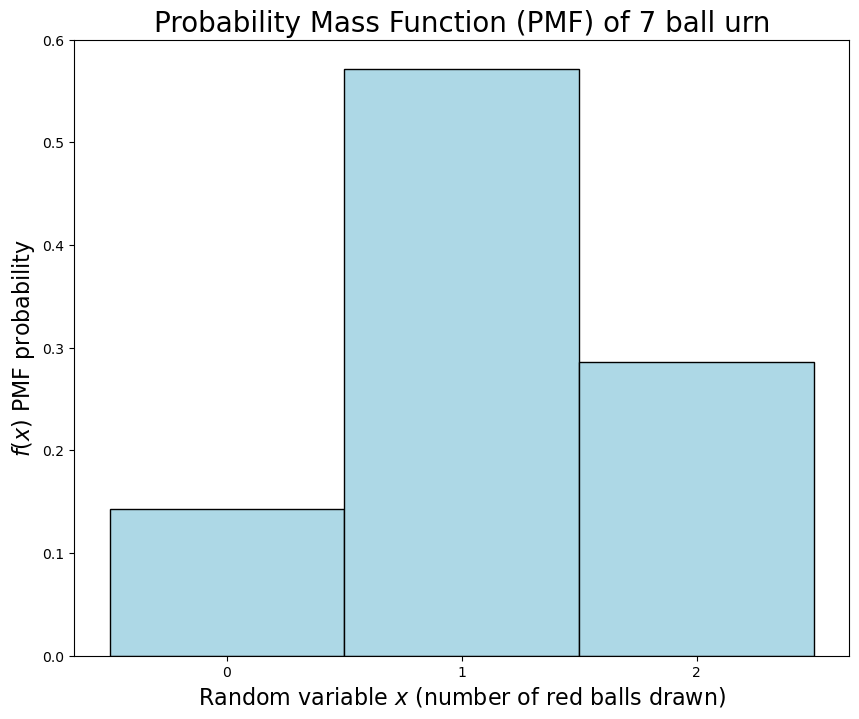

In [22]:
x = np.arange(3)
plt.bar(x, X, color='lightblue', width=1.0, edgecolor='black', tick_label=x);
plt.xlabel('Random variable $x$ (number of red balls drawn)', fontsize=16);
plt.ylabel('$f(x)$ PMF probability', fontsize=16);
plt.title('Probability Mass Function (PMF) of 7 ball urn', fontsize=20);

You should keep this histogram in mind, it summarizes the discrete probability distribution
we have described here.  The total area of the bars must add up to 1.0, and each bar
represents the probability of the random variable $P(X = x)$ occurring.

Another useful concept to think about at this point is the cumulative probability
of the mass function.  This is simply the cumulative sum for each value
of the discrete random variable.  We use $F(x)$ to represent the cumulative
probability mass function.  Notice of course that the sum of the probabilities
should always add up to 1. The probability for 1 here represents the cumulative
probability that the random variable is $x <= 1$ or in other words the sum of
$F(X=1) = f(x=0) + f(x=1)$

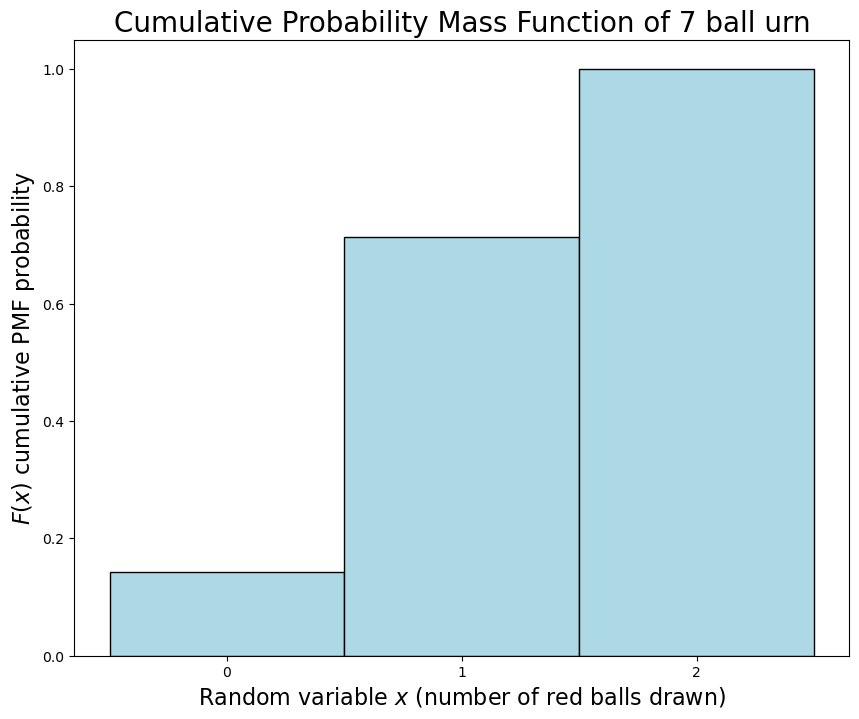

In [23]:
x = np.arange(3)
plt.bar(x, np.cumsum(X), color='lightblue', width=1.0, edgecolor='black', tick_label=x);
plt.xlabel('Random variable $x$ (number of red balls drawn)', fontsize=16);
plt.ylabel('$F(x)$ cumulative PMF probability', fontsize=16);
plt.title('Cumulative Probability Mass Function of 7 ball urn', fontsize=20);

## Continuous Probability Distributions

A continuus probability distribution is a distribution of a continuous random variable
that we defined before.  A continuous random variable cannot be presented in
tabular form as we did for a discrete distribution.  It must be expressed as a formula.

A continuous random variable has a probability of 0 of assuming *exactly* any
given value, since there are infinitely many exact values that a random value
can assume.  This is startling until you think about it a bit.  Thus we
must describe continuous probabilities in terms of *intervals* on the distribution,
and we have to use and definite integral of the probability function to calculate
the probability.

In dealing with continuous random variables, $f(x)$ is usually called the
**probability density function** or simply the **density function** of
the continuous random variable $X$.

So a continuous probability distribution has similar properties as the discrete
distribution.  The function $f(x)$ is a **probability density function** (or PDF)
for the continuous random variable $X$, defined over the set of real numbers, if

1. $f(x) \ge 0, \text{for all} \; x \in \mathbb{R}$
2. $\int_{-\infty}^{\infty} f(x) \; dx = 1$
3. $P(a < X < b) = \int_{a}^{b} f(x) \; dx$ 

So in english this means that a proper continuous density function must be a
function that 1. is $\ge 0$ for all values of the random variable.  The 2. sum
of the continuous probability density function must sum up to 1, where the sum
will be calculated using the integral of the probability density function.  And 3.
says that if we want to calculate the probability for some
part of the continuous probability function, we sum up the function (agin
using the integral) over the interval of interest.

We will look at some more realistice examples of a continuous PDF in a bit, but
lets look at a made up example.  Given the following function that you are
told is a continuous PDF:

\begin{equation}
f(x) = 
\begin{cases}
\frac{x^2}{3}, & -1 < x < 2 \\
0,             & \text{elsewhere} 
\end{cases}
\end{equation}

This is a fairly simple function to integrate analytically.  But we can use
Python's `scipy` library to integrate it numerically and `NumPy` to
perform the calculations in a vectorized manner.  Lets
first define a vectorized function in python for our pdf:

In [24]:
# define f(x) to implement the given PDF for the continuous random variable
def f(x):
    return np.where(
        # if -1 < x < 2
        (-1 < x) & (x < 2),
             
        # then function is defined as x^2/3
        (x**2)/3,
             
        # everywhere else function will be 0
        0
    )

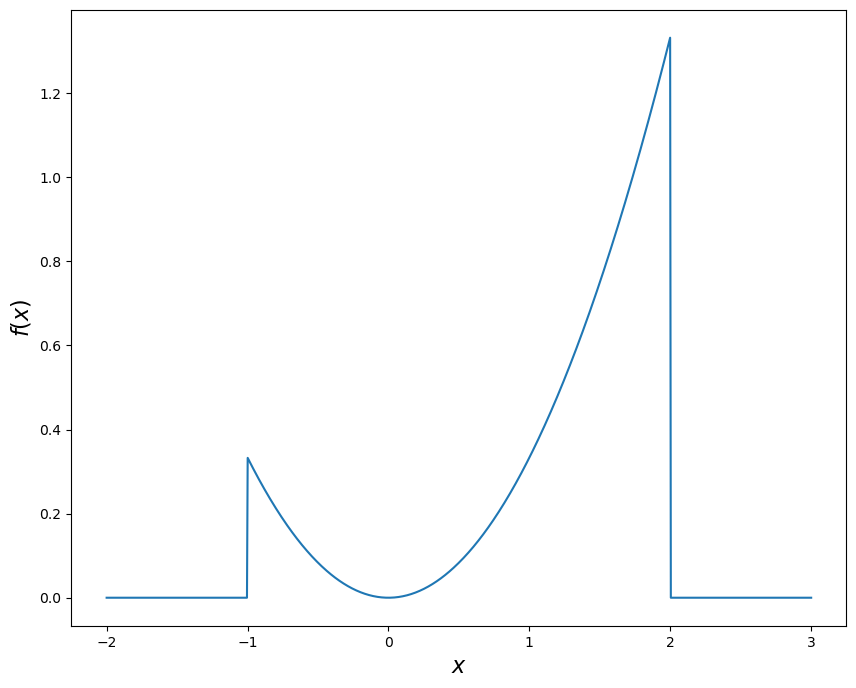

In [25]:
# lets get an idea of what the function looks like
x = np.linspace(-2.0, 3.0, 1000)
plt.plot(x, f(x));
plt.xlabel('$x$', fontsize=16);
plt.ylabel('$f(x)$', fontsize=16);

Because this is a piecewise function it is only defined in the range from -1 to 2, and
it is 0 everywhere else.  It should be obvious that condition 1 is satisfied, the
function is $f(x) \ge 0$ for all values of the random variable $x$.  One thing that
confuses some begining statistis stucents is you may notice it is possible for
a condinuous PDF to exceed 1.0 at places of the function.  But this is not incorrect here.
The only constraint is that the sum of the function over all possible values must
not exceed 1.  So we really need to calculate the area under the curve (not the
height of the curve).  As long as the total area adds up to 1, then the
PDF can be a valid continuous distribution.

Lets check condition 2.  This is only a proper continuous PDF if the sum of the
probabilities adds up to 1.  We can integrate the function and check this is true:

In [26]:
from scipy.integrate import quad as integrate

integrate(f, -np.inf, np.inf)

(0.9999999999999843, 5.148329429438547e-09)

The result may not be exactly 1 since this is a numerical approximation, but it should
essentially be 1 to many digits of precision.  

Finally we can demonstrate property 3 of a continuous function.  Lets say we want
to know the probability that $P(0 \le X \le 1)$.  We can determine this probability
by calculating the corresponding definite integral for the range of the random variable.

In [27]:
integrate(f, 0, 1)

(0.11111111111111112, 1.2335811384723963e-15)

If we solved this integral analytically we find that the probability should be
$\frac{x^3}{9} |_0^1 = \frac{1}{9} - 0 = \frac{1}{9}$ which confirms our
numerical approximation.

Finally we can also define the **cumulative distribution function** (CDF) $F(x)$ of
a continuous random varaible $X$ with density function $f(x)$

\begin{equation}
F(x) = P(X \le x) \int_{-\infty}^{x} f(t) \; dt 
\end{equation}

One reason the cumulative distribution function is useful and important is that
if you have an expression for it, you can use it to compute the probability
of a continuous PDF over some interval like this:

\begin{equation}
P(a < X < b) = F(b) - F(a)
\end{equation}

In practice, when using numerical methods, even if it is difficult to
derive the expression for the cumulative distribution function exactly, we can always
easily approximate it by simply defining the CDF function as the integral from
$-\infty$ to $x$ like this:

In [28]:
# this function is an example of one that is not naturally vectorized.  It will not work
# if we pass it a numpy array array
def F_unvectorized(x):
    # the scipy numerical integration returns tuple (result, accuracy), we
    # only want the result of the cumulative integral from -inf to x to be returned
    return integrate(f, -np.inf, x, limit=1000)[0]

# we will use the vectorize convenience function to make a vectorized version
# NOTE: this function is very inefficient.  It is simply applying the
# unvectorized version to every value of the array, as if in a loop.  This is
# especially inefficient in this case because it means we are doing lots of
# duplicate work calculating the numerical integrals up to x over and over again.
F = np.vectorize(F_unvectorized)


Lets plot the original PDF along with the CDF to visualize the relation of these
two function.  Again remember that the cumulative density function will always start at 0
and will end up with a sum of 1 as the random variable $x$ increases.

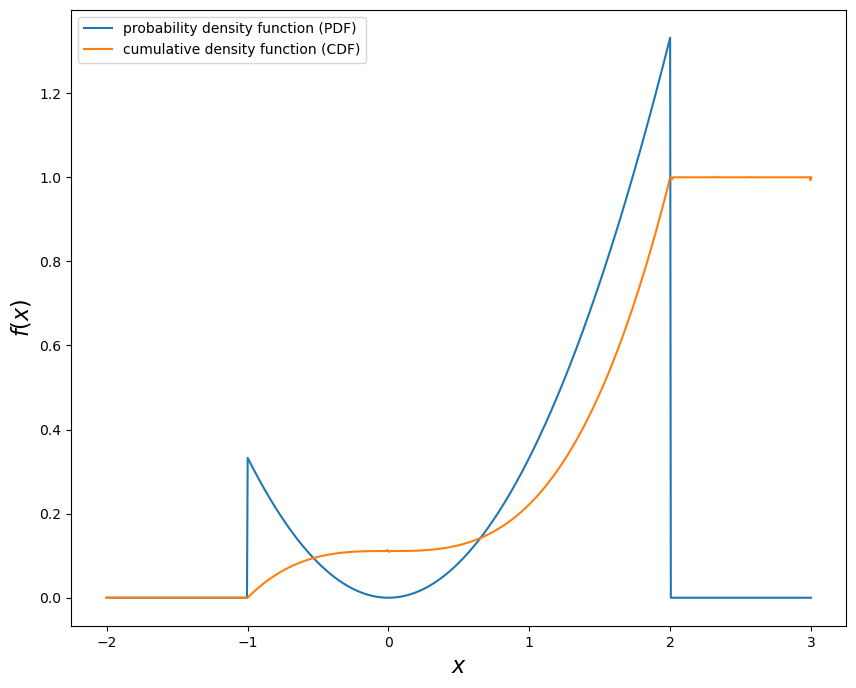

In [29]:
# lets get an idea of what the function looks like
x = np.linspace(-2.0, 3.0, 1000)
plt.plot(x, f(x), label='probability density function (PDF)');
plt.plot(x, F(x), label='cumulative density function (CDF)');
plt.xlabel('$x$', fontsize=16);
plt.ylabel('$f(x)$', fontsize=16);
plt.legend();

So the previous result can be calculated using the CDF like this:

In [30]:
# the probability of the random variable from 0 to 1 
print(F(1) - F(0))

# the total density function, just using the range of the piecewise function here
# as an example
print(F(2) - F(-1))

0.11111111111109984
1.0


# Some Discrete Probability Distributions

## Binomial Distribution

We have seen an example of a binomial distribution already.  If an experiment or process consists of repeated
trials (that are independent), with two possible outcomes, they are referred to as a **Bernoulli Process**
and each trial/outcome is a **Bernoulli trial**.  We can label the two possible outcomes as **success** or
**failure**.  Our examples where we flip a coin repeatedly, and count the number of heads that occur is
a Bernoulli process where each flip is a Bernoulli trial where we designate a heads as a success.

For something to be a Bernoulli process, the following conditions must all be true:

1. The experiment consists of repeated trials.
2. Each trial results in an outcome that may be classified as a success or a failure.
3. The probability of success, denoted by $p$, remains constant from trial to trial.
4. The repated trials are independent.  We either sample with replacement, or we use separate items in the
   trials that always have the same probability of success.
   
The number $X$ of successes in $n$ Bernoulli trials is called a **binomial random variable**.  This is
a discrete random variable.  The probability distribution of this discrete random variable is called
a **binomial distribution**.

Before we look at the expression that calculates the probabilities of a binomial distribution, lets see if
we can derive it ourself from thinking again about the experiment where we flip a coin 3 times.  As before
we will designate a "head" as a success, and we will be counting the number of heads (successes) as our
random variable.  If we are using a fair coin, then the probability of success sould be $p = 0.5$, or in
other words there is a 50/50 chance of a head for each of the Bernoulli trials we perform.  If we are
performing 3 coin flips, then $n = 3$ is the number of trials we are conducting in the Bernoulli process.

We have already calculated the probabiliti distribution of this described Bernoulli process.  The possible
outcomes of the random variable $X$ for $n = 3$ trials are we can have $0, 1, 2$ or $3$ "successes" where
this means we saw $0, 1, 2$ or $3$ heads when flipping the coin 3 times.

As a reminder, the binomial distribution for this experiment where $p = 0.5$ and $n = 3$ is:

In [31]:
coin = ['H', 'T']

# number of outcomes possible for bernouli n=3 bernouli trials where each trial has 2 outcomes (success or failure)
n = 3
N = 2**n 

outcomes = list(itertools.product(coin, repeat=n))
X = np.zeros(4) # calculate the final discrete probability distribution by summing up probability of events

# display the sample space
i = 1
for (coin1, coin2, coin3) in outcomes:
    successes = np.sum([coin1 == 'H', coin2 == 'H', coin3 == 'H'])
    
    print("outcome %02d: %2s %2s %2s %2d %0.5f" % (i, coin1, coin2, coin3, successes, 1.0/N))
    X[successes] += 1.0 / N
    i += 1
    
# display the random variable X and f(x)
print("")
print("%2s %8s" % ('x', 'f(x)'))
for x in range(4):
    print('%2d  %0.5f' % (x, X[x]))

outcome 01:  H  H  H  3 0.12500
outcome 02:  H  H  T  2 0.12500
outcome 03:  H  T  H  2 0.12500
outcome 04:  H  T  T  1 0.12500
outcome 05:  T  H  H  2 0.12500
outcome 06:  T  H  T  1 0.12500
outcome 07:  T  T  H  1 0.12500
outcome 08:  T  T  T  0 0.12500

 x     f(x)
 0  0.12500
 1  0.37500
 2  0.37500
 3  0.12500


The final table represents our discrete binomial random variable probabilities.  There is only 1 way of the
8 of getting all successes (or all failures).  Since $p = 0.5$ each of the 8 possible outcomes are equally likely,
so since only 1 of the 8 results in $x = 3$ successes (and $x = 0$ successes as well), the probability
of those occurring is $0.125$.  Likewsie there are 3 ways to get $x = 1$ head and $x = 2$ heads, so the
probability of those random variable outcomes is $0.375$

We can use the formula for counting the number of combinations to figure out how many ways out of the 8 outcomes
it is possible to come up with each random variable.  For example, for $x = 1$ there are 3 ways of our
Bernoulli process ending up with one success: HTT, THT, TTH.  This is the same as asking, given a set of 3
trials, how many ways are there of ending up with 1 success in the 3 trials?  The ansewr is $\binom{3}{1} = 3$.
Likewise, for $x = 2$ successes, the possibilities are: HHT, HTH, THH, and $\binom{3}{2} = 3$ can be used
to determine the number of outcomes with 2 successes in 3 trials.  For $x = 0$ and $x = 3$ successes
we have TTT and HHH respectively, and the expression $\binom{3}{0} = 1$ and $\binom{3}{3} = 1$ will determine
the count for these possibilities.

In general, given $n$ trials that result in a success or failure, we can count the number of ways of getting $x$
successes (our binomial random variables) using the combinitions of $\binom{n}{x}$ or how to end up with
$x$ successes in $n$ trials.  Now we know that the number of possible outcomes will be $2^n$ so for $n = 3$
trials, there will be $2^n = 8$ outcomes.  If $p = 0.5$ each of the outcomes is equally likely.  Thus the
probability of any one of the outcomes is $\frac{1}{8}$.  This gives us our fist way of calculating in
general the $f(x)$ probabilities for a discrete binomial distribution of $n$ trials where $p = 0.5$
so that all outcomes are equally likely:

\begin{equation}
f(x) = \binom{n}{x} \frac{1}{2^n}
\end{equation}

If we use this expression, we can calculate $f(x)$ our binomial distribution for $n = 3$ trials (and actually for
any number of $n$ Bernoulli trials):

In [32]:
n = 3

print('%2s %6s' % ('x', 'f(x)'))
for x in range(4):
    fx = comb(n, x) * (1.0 / 2.0**n )
    print('%2d %0.5f' % (x, fx))

 x   f(x)
 0 0.12500
 1 0.37500
 2 0.37500
 3 0.12500


A few refinements can be made to this expression.  First of all the expression $\frac{1}{2^n}$ calculates
the probability of each of the $N$ outcomes when each is equally likely.  If $n = 1$ there are only 2
outcomes, and each has a probability of $\frac{1}{2^1} = 0.5$.  If $n = 2$ there are 4 outcomes, all
equally likely, with a probability of $\frac{1}{2^2} = 0.25$.  The expression can be rewritten
as $\big( \frac{1}{2} \big)^n$.  This is expression works when $p = \frac{1}{2}$ or the probability of
success is equally likely to the probability of failure.  But what if the probability of success and failure
are not equal?  Lets say we are throwing an weighted coin, and the probability of getting a
head is $p = \frac{1}{3}$. How does that effect our calculation of the binomial random variable?

Lets go back to the case where we perform a single coin flip so $n = 1$.  In that case there are only
2 outcomes, either we get a head or a tail.  But there is a $p = \frac{1}{3}$ chance of getting a head,
and a $q = 1 - p = \frac{2}{3}$ chance of getting a tail.  The discrete binomial distribution for
this where $n = 1$ and $p = \frac{1}{3} is:

| x |      f(x)     |
|---|---------------|
| 1 | $\frac{1}{3}$ |
| 0 | $\frac{2}{3}$ |

How about for the case where $n = 2$.  In this case the number of successes can be either $0, 1$ or $2$.
What is the probability of getting 2 successes, or flipping 2 heads?  We can use the same concept of
the multplicaiton rule we saw before to determine the number of outcomes.  In this case 1 in 3 times
we would get a head on our first flip, but then in only 1 in 3 times where we got a head the first time
would we then get a head on our second flip as well.  The probability of these occurring in sequence
is going to be $\frac{1}{3} \cdot \frac{1}{3} = \frac{1}{9}$.  By the same argument the probability
of getting 2 tails for this weighted coin is going to be $\frac{2}{3} \cdot \frac{2}{3} = \frac{4}{9}$

Now how about the case when $p = \frac{1}{3}$ of getting 1 success.  For $n = 2$ trials this happens
for 2 of the outcomes: HT, TH. The probability of these happenning by the multiplicaiton property of
probabilities is going to be $p \cdot q = \frac{1}{3} \cdot \frac{2}{3} = \frac{2}{9}$.  But notice
having 1 success can happen in 2 different ways, thus we need to multiply $2 \cdot \frac{2}{9} = \frac{4}{9}$
to get the final probability of getting $x = 1$ success.

So to summarize so far, for $n = 2$ trials of an unfair coin with a probability of success of $p = \frac{1}{3}$
and a probability of failure of $q = 1 - p = \frac{2}{3}$, we will get the following outcomes:

| outcome | coin1 | coin2 | $x$ |  probability of outcome |
|---------|-------|-------|-----|------------------------------------------------|
|   1     |   H   |   H   |  2  | $\frac{1}{3} \cdot \frac{1}{3} = \frac{1}{9} $ |
|   2     |   H   |   T   |  1  | $\frac{1}{3} \cdot \frac{2}{3} = \frac{2}{9} $ |
|   3     |   T   |   H   |  1  | $\frac{2}{3} \cdot \frac{1}{3} = \frac{2}{9} $ |
|   4     |   T   |   T   |  0  | $\frac{2}{3} \cdot \frac{2}{3} = \frac{4}{9} $ |

The discrete binomial distribution table then for $n = 2$ with a probability of success of $p = \frac{1}{3}$
will be:

|   $x$   |   $f(x)$  |
|---------|-----------|
|    2    | $\frac{1}{9}$ |
|    1    | $\frac{4}{9}$ |
|    0    | $\frac{4}{9}$ |

In general, to calculate the probability of an outcome, we need the following expression:

\begin{equation}
p^x q^{n-x}
\end{equation}

Here $p$ is the probability of success, and $q = 1 - p$ is its inverse, or the probability of failure.  For
$x$ successes, the probability will be $p^x$ of them occurring, and since $n-x$ is an expression for the number
of failures $q^{n-x}$ is the probability of seeing that many failures.

This leads to the final general expression for the discrete binomial distribution:

\begin{equation}
b(x; n, p) = \binom{n}{x} p^x q^{n-x}, x = 0, 1, 2, \cdots, n
\end{equation}

Here we have renamed our distribution function $b()$.  The parameter $x$ is the count of the number of successes
we want to calculate the probability of.  $n$ and $p$ are meta-parameters of the Bernoulli process, where $n$
is the number of Bernoulli trials to conduct and $p$ is the probability of getting a success in a given trial.
$q$ is not given as a meta parameter, but implicitly $q$ is the probability of failure, and it is the
complement of $p$, $q = 1 - p$.

Using this expression, any repeated experiment of Bernoulli trials, where the trials are independent of one another,
and there are only 2 outcomes that we label as success or failure for each trial, can be modeled and its
discrete probability distribution determined from the binomial distribution equation.

**Example: Binomial distribution in practice**

Lets perform a quick example with a somewhat more realistic/useful premise.

The probability of surviving a shock test is $\frac{3}{4}$.  If 4 components are selected randomly
for testing using the shock test, and if we assume the results of testing one component are completely
independent of testing any of the others, then each shock test is a Bernoulli trial, and the
binomial distribution equation governs the probabilities of this testing.

First of all, lets calculate the probabilities by hand by enumerating the outcomes and using the
multiplication rule of probabilities to determine the binomial distribution.  For this example,
we have $n = 5$ trials, and $p = \frac{3}{4}$ is the probability of success, where success is surviving
the shock test, and $q = \frac{1}{4}$ is the probability of failing the shock test.  The
full set of possible outcomes, with the corresponding random variable $x$ the count of the number of
successes, and the probability of each outcome looks like this:



In [33]:
test = ['Survived', 'Failed'] # where Survived is a successful test

# number of outcomes possible for bernouli n=4 bernouli trials where each trial has 2 outcomes (success or failure)
n = 4
N = 2**n 
p = 3.0/4.0 # probability of success, surviving the shock test
q = 1.0 - p # probability of failure

outcomes = list(itertools.product(test, repeat=n))
X = np.zeros(n+1) # calculate the final discrete probability distribution by summing up probability of events

# display the sample space
i = 1
for (test1, test2, test3, test4) in outcomes:
    successes = np.sum([test1 == 'Survived', test2 == 'Survived', test3 == 'Survived', test4 == 'Survived'])
    probability = p**successes * q**(n - successes)
    print("outcome %02d: %8s %8s %8s %8s %2d %0.5f" % (i, test1, test2, test3, test4, successes, probability))
    X[successes] += probability
    i += 1
    
# display the random variable X and f(x)
print("")
sum = 0.0 # probabilities should sum up to 1.0
print("%2s %8s" % ('x', 'f(x)'))
for x in range(n+1):
    print('%2d  %0.5f' % (x, X[x]))
    sum += X[x]
print('Sum: ', sum)

outcome 01: Survived Survived Survived Survived  4 0.31641
outcome 02: Survived Survived Survived   Failed  3 0.10547
outcome 03: Survived Survived   Failed Survived  3 0.10547
outcome 04: Survived Survived   Failed   Failed  2 0.03516
outcome 05: Survived   Failed Survived Survived  3 0.10547
outcome 06: Survived   Failed Survived   Failed  2 0.03516
outcome 07: Survived   Failed   Failed Survived  2 0.03516
outcome 08: Survived   Failed   Failed   Failed  1 0.01172
outcome 09:   Failed Survived Survived Survived  3 0.10547
outcome 10:   Failed Survived Survived   Failed  2 0.03516
outcome 11:   Failed Survived   Failed Survived  2 0.03516
outcome 12:   Failed Survived   Failed   Failed  1 0.01172
outcome 13:   Failed   Failed Survived Survived  2 0.03516
outcome 14:   Failed   Failed Survived   Failed  1 0.01172
outcome 15:   Failed   Failed   Failed Survived  1 0.01172
outcome 16:   Failed   Failed   Failed   Failed  0 0.00391

 x     f(x)
 0  0.00391
 1  0.04688
 2  0.21094
 3  0.4

This is what we get if we enumerate the outcomes by hand and sum up the probabilities.  Assuming we plugged in
our numbers correctly when generating the probabilities and all outcomes by hand here, we should get the
same result for the final discrete binomial distribution.  We could make our own function:


In [34]:
def binomial_distribution(x, n, p):
    """Calculate the binomial distribution for the random variable x.  This function is vectorized,
    so x can be an array of values, but x must contain discrete integers in the range [0, n].
    
    Parameters
    ----------
    x - random bernouli variable, count of number of successes we should determine probability of getting
    n - a meta parameter, this should be a scalar value which is the number of bernouli trials in the experiemt
    p - a meta parameter, this should be a scalar value with is the probability of success.  The probability
        of failure is the complement of this value q = 1 - p
    """
    # determine probability of failure
    q = 1.0 - p
    
    # calculate probability of random variable(s) x using binomial distribution formula
    # we assume that the function for calculations of combination of items n choose x has been
    # imported and named comb() here
    return comb(n, x) * p**x * q**(n-x)

In [35]:
n = 4 # number of trials
p = 3.0/4.0 # probability of success
x = np.arange(0, n+1)
print(x, binomial_distribution(x, n, p))

[0 1 2 3 4] [0.00390625 0.046875   0.2109375  0.421875   0.31640625]


Of course we should probably use profesionally developed libraries and functions for working wit standard
distributions.  `scipy.stats` has functions for computing the probability mass functions (PMF) and cumulative
mass functions (CMF) of the binomial and other distributions we will use in this review.  To use the binomial
functions, do the following:

In [36]:
from scipy.stats import binom

n = 4 # number of trials
p = 3.0/4.0 # probability of success
x = np.arange(0, n+1)

# the pmf or probability mass function
b = binom(n, p)

sum = 0.0
print('%2s: %8s' % ('x', 'h(x)'))
for x in np.arange(n+1):
    print('%2d: %0.8f' % (x, b.pmf(x)))
    sum += b.pmf(x)
print('sum: %0.8f' % sum)

 x:     h(x)
 0: 0.00390625
 1: 0.04687500
 2: 0.21093750
 3: 0.42187500
 4: 0.31640625
sum: 1.00000000


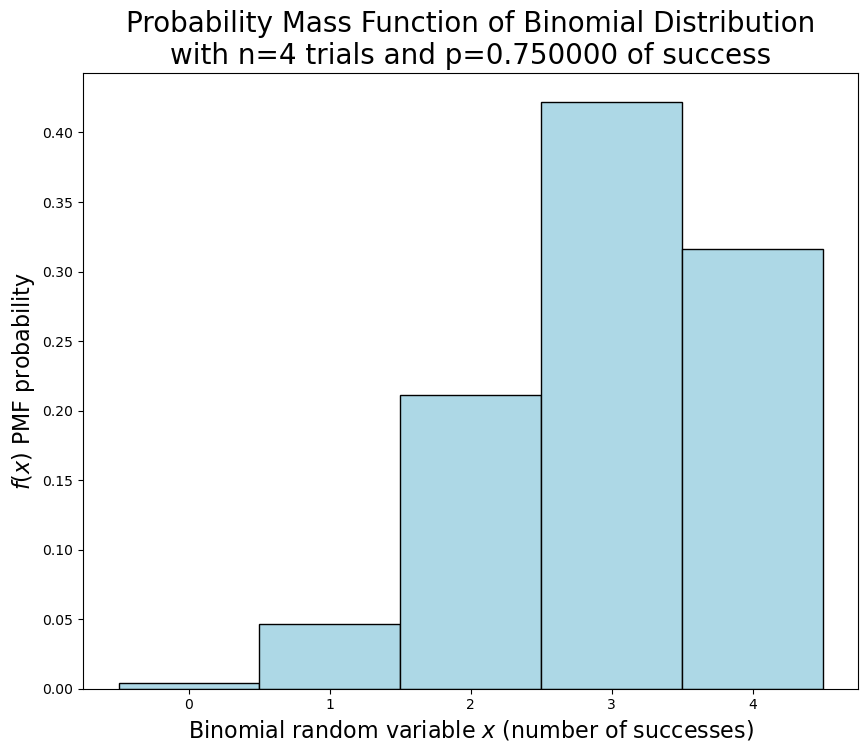

In [37]:
# plot the discrete binomial distribution as a histogram
x = np.arange(n+1)
plt.bar(x, b.pmf(x), color='lightblue', width=1.0, edgecolor='black', tick_label=x);
plt.xlabel('Binomial random variable $x$ (number of successes)', fontsize=16);
plt.ylabel('$f(x)$ PMF probability', fontsize=16);
plt.title('Probability Mass Function of Binomial Distribution\nwith n=%d trials and p=%f of success' % (n, p), fontsize=20);

In [38]:
# the cmf or cumulative distribution (mass) function
print(x, binom.cdf(x, n, p))

[0 1 2 3 4] [0.00390625 0.05078125 0.26171875 0.68359375 1.        ]


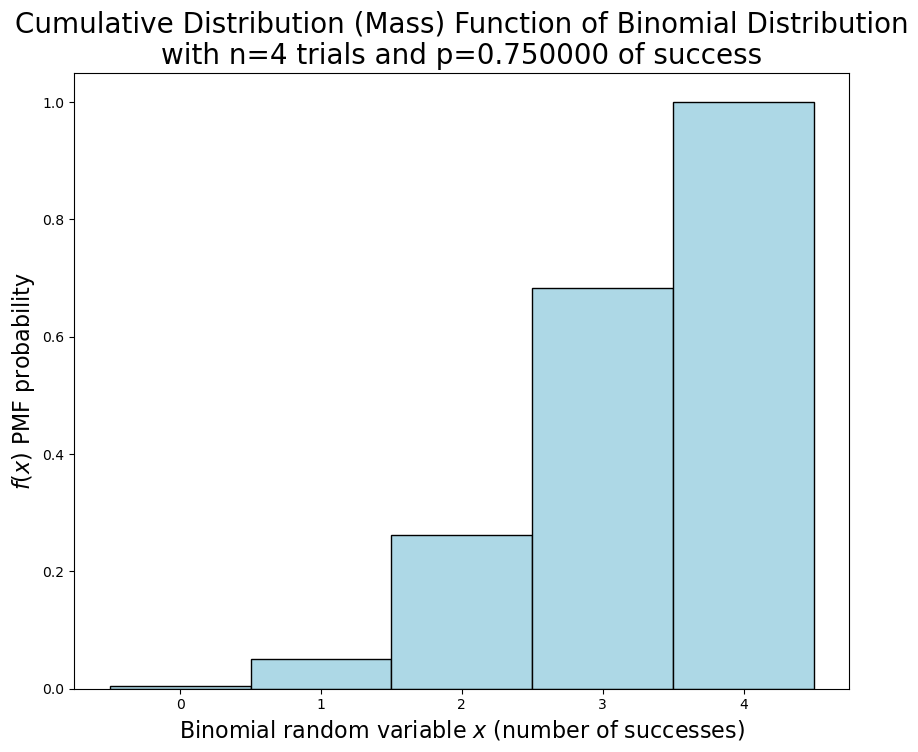

In [39]:
# plot the discrete binomial cumulative distribution as a histogram
plt.bar(x, b.cdf(x), color='lightblue', width=1.0, edgecolor='black', tick_label=x);
plt.xlabel('Binomial random variable $x$ (number of successes)', fontsize=16);
plt.ylabel('$f(x)$ PMF probability', fontsize=16);
plt.title('Cumulative Distribution (Mass) Function of Binomial Distribution\nwith n=%d trials and p=%f of success' % (n, p), fontsize=20);

## Hypergeometric Distribution

All trials of a binomial distribution must be indepenent, such as sampling with replacement from a deck of cards,
or flipping the same coin multiple times.  However, there are many types of processes or experiments where
successive trials are not independent, and we often want to model the probability distributions of such
dependent processes.

In a **hypergeometric expereiment** we are interested in the probability of selecting $x$ successes from
$k$ items labeled successes.  We will perform $n$ trials.  We will be selecting from a sample with a total
number $N$ of items, thus if there are $k$ items in the collection that are labeled as successes, there
are $N-k$ items in there that are failures.  Repeated trials are not independent in this case, because
when we take an item out we do not replace it, so removing items effect the subsequent probability of
drawing successful or failure items from the collection.

The hypergeometric experiment possesses the following two properties:
1. A random sample of size $n$ is selected without replacement from the $N$ items.
2. Of the $N$ items, $k$ may be classified as successes and $N - k$ are classified as failures.

The number $X$ of successes of a hypergeometric experiment is called a **hypergeometric random variable**.
This probability distribution is again discrete and is called the **hypergeometric distribution**).

Instead of deriving the expressing for the hypergeometic distribution, lets just jump right to it this time.
A hypergeometric random variable $X$ where $x$ is the number of successes in a random sample of size $n$
from $N$ items of which $k$ are labeled **success** and $N - k$ are labeled **failure** is:

\begin{equation}
h(x; N, n, k) = \frac{\binom{k}{x} \binom{N - k}{n - x} }{ \binom{N}{n} }
\end{equation}

A few points about this expression.  The bottom of the fraction should make sense to you.  Given
we have a collection of $N$ items and we are sampling $n$ of them, $\binom{N}{n}$ tells us how
many possible outcomes there are of choosing $n$ items from the collection of $N$ items (without
regard to the order of the items chosen).  At the top, the expression $\binom{k}{x}$ is the number
of ways of choosing $x$ successes from the $k$ successful items in the collection.  In the other part
of the numerator, if we are calculating the probability of getting $x$ successes, this means we will
also get $n - x$ failures.  And as we already mentioned there are $N - k$ items in collection that are
failure items.  So the expression $\binom{N - k}{n - x}$ is counting the number of ways of getting some
number of failures out of the collection with a total of $N - k$ failure items.  By the multiplicaiton
rule, the product of these 2 expressions will be the total number of ways of sampling $x$ successes
and $n - x$ failures from the collection.

**Example: hypergeometric distribution**

Lets make the discussion a bit more concrete by looking at an example application.  Lets say
we have a bag with 20 white balls, which will be labeled as the successes, and 80 black balls
which are our failures.  So the collection size is $N = 100$.  Lets say we are drawing samples
of size $n = 5$ without replacement.  What is the probability of getting 3 white ball successes
in a sample of size 5 without replacement?  We can just directly plug in the values to the
hypergeometric distribution equation to get our answer:

\begin{equation}
h(x=3; N=100, n=5, k=20) = \frac{ \binom{20}{3} \binom{80}{2} }{ \binom{100}{5} } \approx 0.047848
\end{equation}

In [40]:
(comb(20,3) * comb(80,2)) / comb(100,5)

0.04784856773074741

This tells us that the probability of drawing 3 white balls is pretty small, less than 5% in this case.
This should make intuitive sense since the probability is only 0.2 of drawing a white ball, and we have
to draw more of them than black balls to get 3 successes here.

We could again create our own function to compute the hypergeometric distribution.  Though it is best to use
the functions from `scipy.stats` again here if you need to work with models of hypergeometric distributions:

In [41]:
from scipy.stats import hypergeom

n = 5 # number of trials
N = 100 # number of items in collection we are sampling from
n = 5 # number of samples we will take without replacement from the N items
k = 20 # number of "success" items in collection.  There are thus N - k "failure" items in the collection


# the pmf or probability mass function
h = hypergeom(N, k, n)
sum = 0.0
print('%2s: %8s' % ('x', 'h(x)'))
for x in np.arange(n+1):
    print('%2d: %0.8f' % (x, h.pmf(x)))
    sum += h.pmf(x)
print('sum: %0.8f' % sum)

 x:     h(x)
 0: 0.31930944
 1: 0.42014400
 2: 0.20734379
 3: 0.04784857
 4: 0.00514826
 5: 0.00020593
sum: 1.00000000


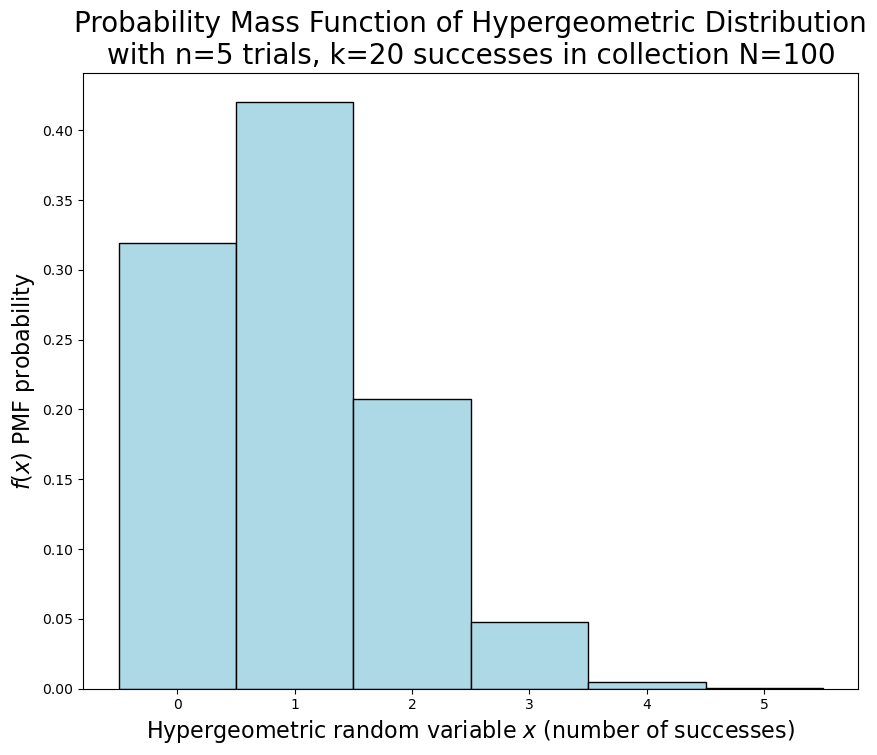

In [42]:
# plot the discrete hypergeometic distribution as a histogram
x = np.arange(n+1)
plt.bar(x, h.pmf(x), color='lightblue', width=1.0, edgecolor='black', tick_label=x);
plt.xlabel('Hypergeometric random variable $x$ (number of successes)', fontsize=16);
plt.ylabel('$f(x)$ PMF probability', fontsize=16);
plt.title('Probability Mass Function of Hypergeometric Distribution\nwith n=%d trials, k=%d successes in collection N=%d' % (n, k, N), fontsize=20);

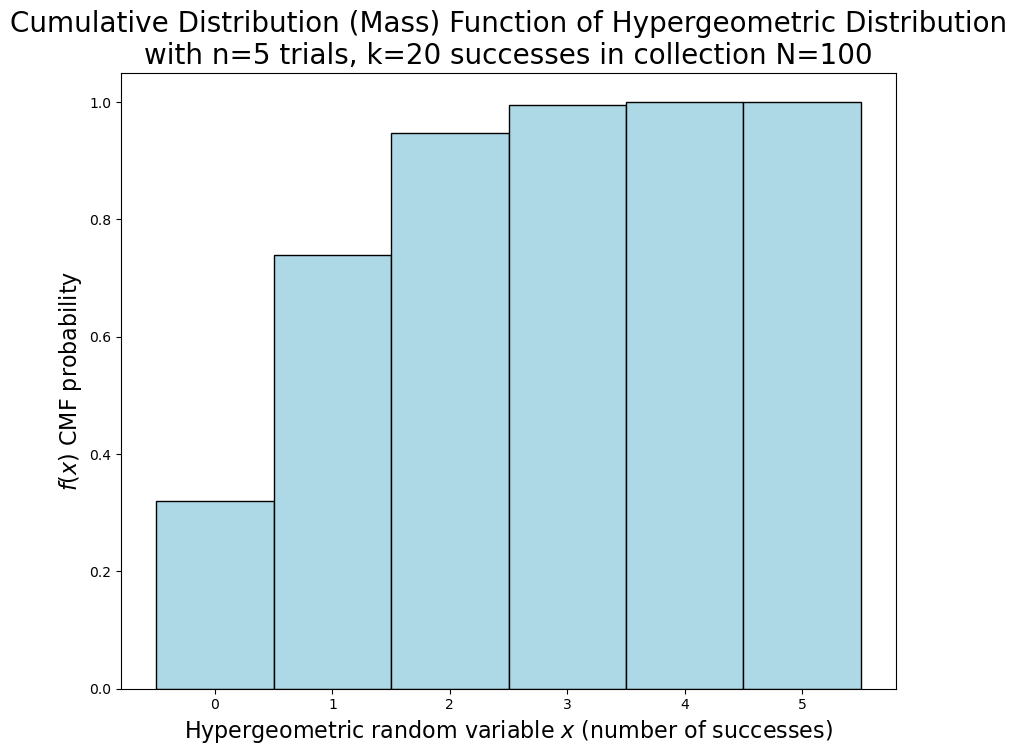

In [43]:
# plot the discrete hypergeometric cumulative distribution as a histogram
plt.bar(x, h.cdf(x), color='lightblue', width=1.0, edgecolor='black', tick_label=x);
plt.xlabel('Hypergeometric random variable $x$ (number of successes)', fontsize=16);
plt.ylabel('$f(x)$ CMF probability', fontsize=16);
plt.title('Cumulative Distribution (Mass) Function of Hypergeometric Distribution\nwith n=%d trials, k=%d successes in collection N=%d' % (n, k, N), fontsize=20);

This problem is complicated enough that we might want to check empirically if we do in fact end up
with the same results if we actually run this experiment.  Again we could get a bag and 100 balls, and
draw lots of samples, recording the observed distribution of the number of white ball "successes" we
observe.  But if we trust our random number generator sufficiently, we can also simulate this experiment
so that we don't have to run it in real life.

We will create a representation that has 20 white and 80 black balls, and randomly sample 5 balls without
replacement from the simulated bag.  We will run this experiment many times and count up the number of
successes to empirically estimate our random hypergeometric variable $X$.

In [44]:
# hypogemetric experiment parameters
N = 100 # number of items in the bag
k = 20 # number of white balls, or "successes" in the bag
b = N - k # bumber of black balls, or "failures" in the bag
n = 5 # number of samples to take for each trial without replacement

# lots of ways to create a representation of our bag.  Here is a fairly readable/symbolic way
bag = np.array(['white'] * k + ['black'] * b)
#print(bag)
#print(len(bag))
#print(bag.shape)

# perform a large number of trials or experiments where we draw the needed sample
NUM_TRIALS = 10000
X = np.zeros(n+1) # will hold the counts of the number of successes we see
for trial in range(NUM_TRIALS):
    # we can use np.random.choice() to sample randomly from a list without replacement
    sample = np.random.choice(bag, size=n, replace=False)
    successes = np.sum(sample == 'white')
    #print(trial, sample, successes)
    X[successes] += 1
    
# display the results as a table
print('%2s: %8s' % ('x', 'h(x)'))
for x in range(n+1):
    probability = X[x] / float(NUM_TRIALS) 
    print('%2d: %0.8f' % (x, probability))

 x:     h(x)
 0: 0.32740000
 1: 0.41660000
 2: 0.20110000
 3: 0.04870000
 4: 0.00600000
 5: 0.00020000


You can compare our imperical results with the theoretical distribution we get from the
hypergeometric pmf above.  If you want more accuracy in the estimate of the probabilities, increate
the NUM_TRIALS so we sample more times.

## Poisson Distribution

The final discrete distribution we will look at briefly is the Poisson distribution.  The Poisson distribution
is important in computer science as a lot of things can be modeled using Queueing theory, and the arrival of
items into systems are often goverened by Poisson distributions.

The discrete Poisson experiment is anohter example of a process goverened by independeM, n, Nnt processes (like the
binomial experiment).  Experiments yielding (discrete) numerical values of a random variable $X$ counting
the number of outcomes occurring during a given time interval or in a specified region, are
called **Poisson experiments**.

For a something to be governed by a Poisson process, all of the following properties must be true:

1. The number of outcomes occurring in one time interval or specified region of space is independent of the
   number that occur in any other disjoing time interval or region.  Or in other words, what happens
   duing a past time period has no effect or no predictive power on what will happen next (they are
   disjoint, or independent).
2. The probability that a single outcome will occur during a very short time interval or in a small region
   is proportional to the length of the time interval or the size of the region, and does not depend
   on the number of outcomes occurring outside this time interval or region.
3. The probability that more than one outcome will occur in such a short time interval or fall in such
   a small region is negligible.
   
The number $X$ of outcomes occurring during a Poisson experiment is called a **Poisson random variable**,
and its probability distribution is called the discrete **Poisson distribution**.

The mean number of outcomes in a Poisson process is computed from $\mu = \lambda t$, where $t$ is the
specific "time", "area" or "volume" of interest.  For a unit time or area of $t = 1$ then, the average
arrivals or average count is goverend simply by the variable $\lambda$

The probability distribution of the Poisson random variable $X$, representing the number of outcomes occurring
in a given time interval or specified region denoted by $t$ is:

\begin{equation}
p(x; \lambda t) = \frac{e^{-\lambda t} (\lambda t)^x }{x!}, x = 0, 1, 2, \cdots
\end{equation}

where $\lambda$ is the average number of outcomes per unit time (distance, area, ...).

It is not necessary to understand the derivation of the Poisson distribution expression here.  Lets look
at an example of using a Poisson distribution to model a Poisson process.

**Example: Poisson distribution**

Given that 10 customers arrive per hour at the bank, and that customer arrival is governed
by a poisson process, calculate and show the expected distribution of arrivals per hour.

Here $t = 1$ hour and is specified in unit time so $\lambda = 10$ is the only parameter governing the
Poisson discrete distribution.  As before, we can use `scipy.stats` functions to find the
pmf and cdf for a Poisson probability distribution.

One difference from our previous distributions, for both the binomial and the hypergeometric
distribution, the number of successes was bounded by the number of trials performed.  So if
we were performing $n$ trials or drawing $n$ samples, the possible range of the count of successes
is from $0$ to $n$.  However in theory a Poisson distribution has no upper bound.  Though
10 people arrive on average per hour, in theory we can have a huge rush on the bank because
of a collapse of the stock market, and see 100 or 1000 or more arrivals.  The Poisson process
is a type of exponential process.  It is still discrete, but these unusual large events can be
modeled and can occur occassionally.

In [45]:
from scipy.stats import poisson

# the average arrivals per hour
lmbda = 10 
# there is no upper bound on the random variable of a poisson process
# but probability will be essentially 0 once we get far above 10
n = 25

# the pmf or probability mass function
p = poisson(lmbda)
sum = 0.0
print('%2s: %8s' % ('x', 'h(x)'))
for x in np.arange(n+1):
    print('%2d: %0.8f' % (x, p.pmf(x)))
    sum += p.pmf(x)
print('sum: %0.8f' % sum)

 x:     h(x)
 0: 0.00004540
 1: 0.00045400
 2: 0.00227000
 3: 0.00756665
 4: 0.01891664
 5: 0.03783327
 6: 0.06305546
 7: 0.09007923
 8: 0.11259903
 9: 0.12511004
10: 0.12511004
11: 0.11373640
12: 0.09478033
13: 0.07290795
14: 0.05207710
15: 0.03471807
16: 0.02169879
17: 0.01276400
18: 0.00709111
19: 0.00373216
20: 0.00186608
21: 0.00088861
22: 0.00040391
23: 0.00017561
24: 0.00007317
25: 0.00002927
sum: 0.99998232


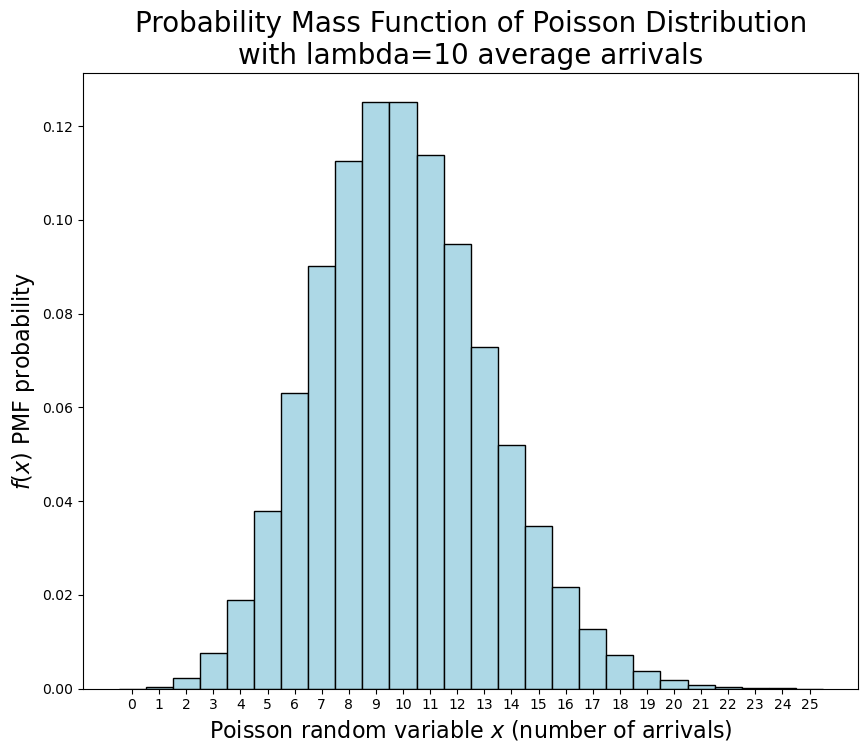

In [46]:
# plot the discrete Poisson distribution as a histogram
x = np.arange(n+1)
plt.bar(x, p.pmf(x), color='lightblue', width=1.0, edgecolor='black', tick_label=x);
plt.xlabel('Poisson random variable $x$ (number of arrivals)', fontsize=16);
plt.ylabel('$f(x)$ PMF probability', fontsize=16);
plt.title('Probability Mass Function of Poisson Distribution\nwith lambda=%d average arrivals' % (lmbda), fontsize=20);

# Some Continuous Probability Distributions

As we discussed above, a continuous probability distribution is one defined on a continuous random variable
$X$.  Since there are infinitely many real numberd values on a number line, say from 0 to 1, that means
that the probability will be 0 of a continuous random variable being a particular value.  But continuous
probability distributions do make sense.  The sum of the area under the function governing the
continuous random distribution must add up to 1 to be a proper probability distribution.  Then we can
calculate probabilities of the random variable, for example the probability that the random variable
is between $\frac{1}{3}$ and $\frac{2}{3}$ is a well posed question when working with continuous
probability distributions.

## Uniform Distribution

We will first look at the simple but still useful uniform continuous probability distribution.  In a sense we
have seen some examples of a discrete uniform distribution.  For example, when rolling a fair dice, there is
a uniform probability of any of the 6 numbers coming face up.  Thus the probability of each of these equally
likely outcomes, as we have seen, is $\frac{1}{6}$ in the case of a fair dice.  We could simulate
a fair dice using the `np.random.choice()` function again, as it samples with a uniform (equal) probability
among the items:

In [47]:
# create a dice with faces 1 through 6
dice = np.arange(6) + 1 
#print(dice)

# roll a dice 10 times
for roll in range(10):
    print(roll, np.random.choice(dice))
    
    
# you can also use np.random.randint() to generate a discrete integer with uniform
# probability in a range of values.  This function returns integers in
# the half-open interval [low, high), which means it will include low as a random
# value, but not high, so to get values 1-6, we need to specify low=1 and high=7
# roll a dice 10 times
for roll in range(10):
    print(roll, np.random.randint(1, 7))

0 1
1 4
2 1
3 3
4 1
5 3
6 6
7 6
8 4
9 5
0 6
1 4
2 2
3 1
4 5
5 6
6 1
7 5
8 5
9 1


The continuous uniform distribution has an equal probability of generating any value in the
range $[A, B]$, where $A$ and $B$ are parameters of the continuous uniform distribution.

The probability density function (PDF) of the continuous uniform random variable $X$ on the
interval $[A, B]$ is:

\begin{equation}
f(x; A, B) = 
\begin{cases}
\frac{1}{B-A}, & A \le x \le B \\
0, & \text{elsewhere} 
\end{cases}
\end{equation}

Lets look first at the easist case of a continuous uniform distribution on the interval $[0, 1]$.
By the definitions of a continuous probability density function $f(x)$ the first 2 properties it must have are:

1. $f(x) \ge 0, \text{for all} x \in \mathbb{R}$
2. $\int_{-\infty}^{\infty} f(x) \; dx = 1$ 

For the piecewise function you can see that property 1 is satisfied.  As long is $A$ is less than $B$
their difference will be positive, and thus the function will always be either 0 or a positive fraction.
For the interval $[0, 1]$ the density function $f(x) = 1$ when x is between 0 and 1, and it is 0
elsewhere.  Lets just create and plot this function:

In [48]:
def f(x):
    return np.where(
        # if 0 < x < 1
        (0 <= x) & (x <= 1),
             
        # then function is defined as 1.0 / (B - A)
        1.0,
             
        # everywhere else function will be 0
        0.0
    )    

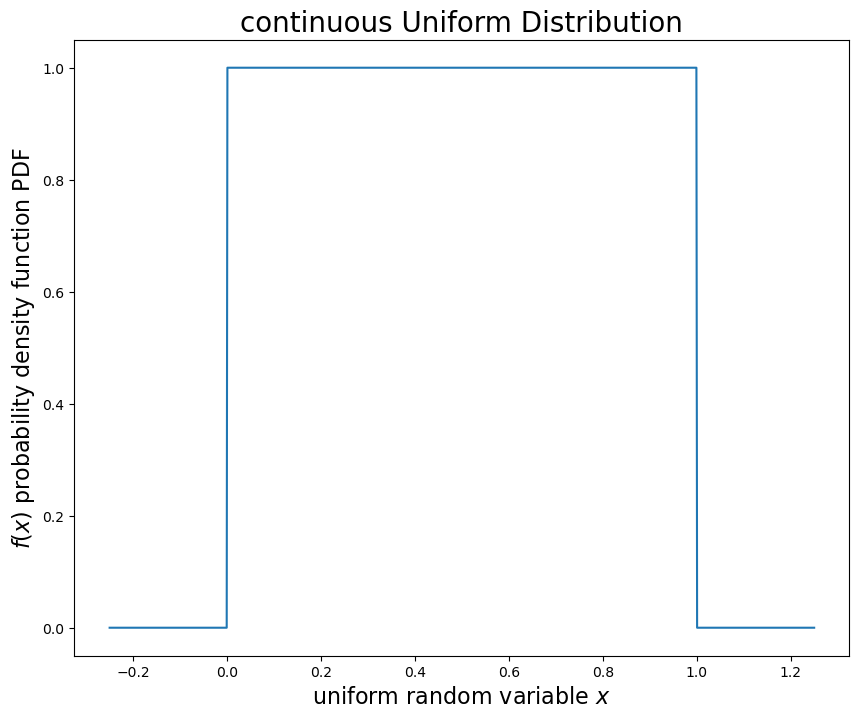

In [49]:
x = np.linspace(-0.25, 1.25, 1000)
plt.plot(x, f(x));
plt.xlabel('uniform random variable $x$', fontsize=16);
plt.ylabel('$f(x)$ probability density function PDF', fontsize=16);
plt.title('continuous Uniform Distribution', fontsize=20);

It should be obvious that property 2 is also satisfied from looking at the probability density function.
The function forms a box with width of 1 and height of 1 thus the area (and thus total probability
density) of the function $f(x) = 1$.

We can ask questions like: what is the probability $P(0.4 \le x \le 0.6)$  Since the height of the
function is always 1, you should se that $P(0.4 \le x \le 0.6) = 0.2$.  By property 3 of continuous
probability distributions, the integral of the function describing the probability density over this
interval should give us the probability:

In [50]:
integrate(f, 0.4, 0.6)

(0.19999999999999996, 2.2204460492503127e-15)

We can define uniform distributions for different intervals other than the unit iterval.  For example, for
the interval $[-2, 2]$ the function looks like this:

In [51]:
def f(x):
    return np.where(
        # if -2 < x < 2
        (-2 <= x) & (x <= 2),
             
        # then function is defined as 1.0 / (B - A)
        1.0 / 4.0,
             
        # everywhere else function will be 0
        0.0
    )    

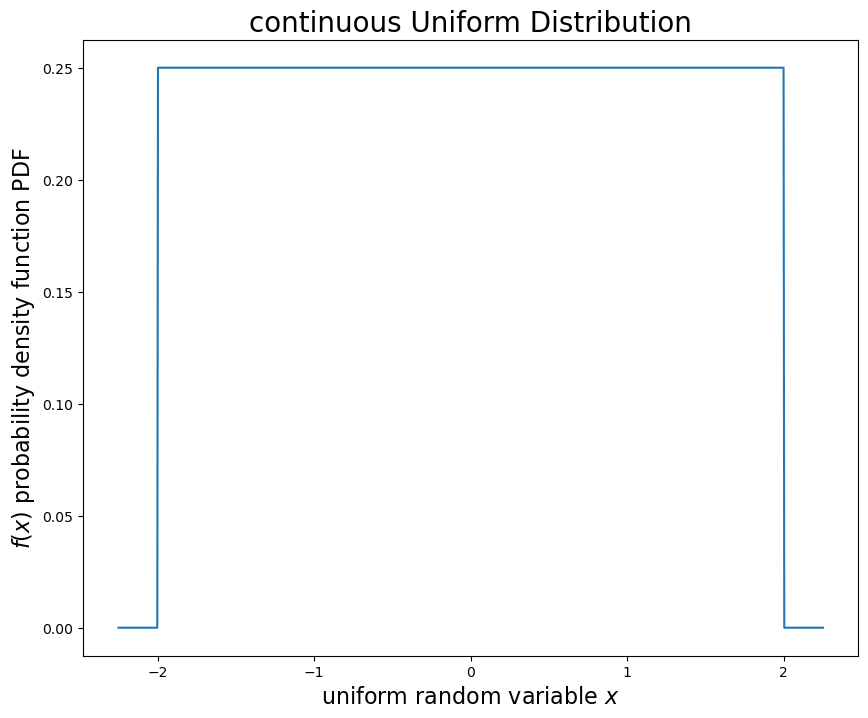

In [52]:
x = np.linspace(-2.25, 2.25, 1000)
plt.plot(x, f(x));
plt.xlabel('uniform random variable $x$', fontsize=16);
plt.ylabel('$f(x)$ probability density function PDF', fontsize=16);
plt.title('continuous Uniform Distribution', fontsize=20);

Since the width of the interval is 4, the height of the function is $\frac{1}{4}$ so that the total area
is stil 1.0.  If we want to know the probability of seeing a random number from this distribution in
the range from -1 to 1, the probability must be 0.5 (base of 2 and height of 0.25).

`scipy.stats` does have a `uniform` object for handling continuous uniform random variables, though
it is a bit of an overkill.  Most of the time if you want a random uniform variable, you can use
`np.random` functions:

In [53]:
# draw 10 random numbers from a continuous random uniform distribution using numpy random library
for trial in range(10):
    print(trial, np.random.uniform(-2, 2))

0 -1.238238726575779
1 0.2195748891276641
2 0.5819144632965965
3 1.407547537139497
4 -1.0048376683294293
5 -0.8166660251200994
6 -1.5882674909439158
7 0.15756794447485145
8 1.7749320191572644
9 1.812424807812631


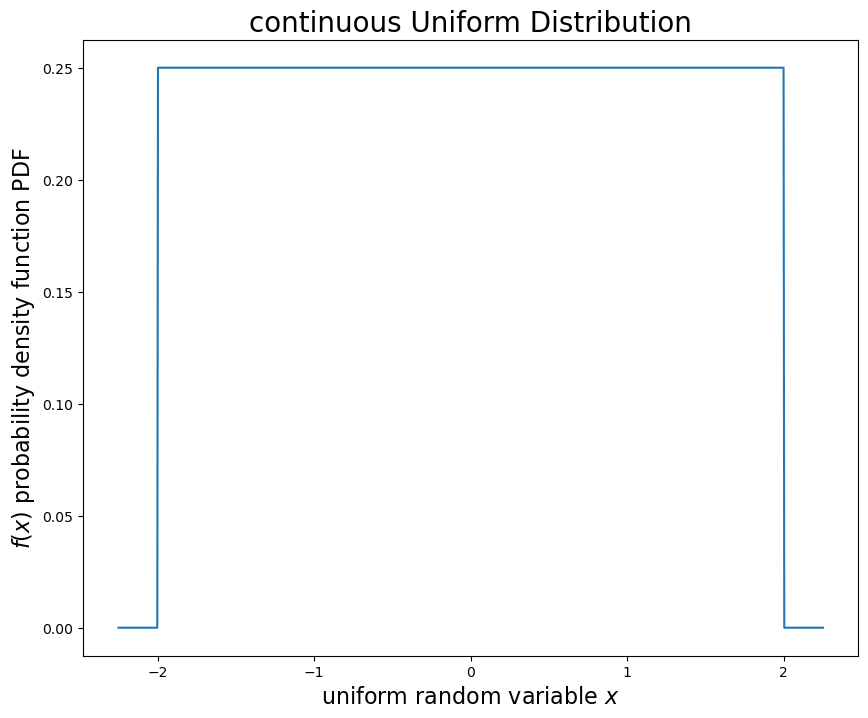

In [54]:
# use scipy.stats uniform object to sample from a continuous uniform distribution
from scipy.stats import uniform

# uniform expects loc and scale, it defaults to loc=0 and scale=1 given uniform distribution on interval [0,1]
# to get from [-2, 2] need start loc=2 with a scale of 4
f = uniform(-2, 4)

# display the pdf using scipy.stats uniform pdf function
x = np.linspace(-2.25, 2.25, 1000)
plt.plot(x, f.pdf(x));
plt.xlabel('uniform random variable $x$', fontsize=16);
plt.ylabel('$f(x)$ probability density function PDF', fontsize=16);
plt.title('continuous Uniform Distribution', fontsize=20);

In [55]:
# we didn't show this before, but scipy.stats distributions can be used to sample randomly from
# a distribution.  In this case we want to use the .rvs() function to draw samples.  
# rvs() takes a size parameter, so if we want we can draw 10 random samples all at once
# from the uniform distribution
print(f.rvs(10))

[-0.39941195  1.70105265  0.36169457 -0.41997793 -1.08662807  1.55522128
 -0.59236491  0.37124852  0.39821099 -0.46618402]


It should be clear what we mean by sampling from the uniform distribution here.  It is equally likely to sample
any value inside of the interval of the uniform distribution.  So if we sample 1000 points, we would expect them
to be "uniformly" distributed all along the interval:

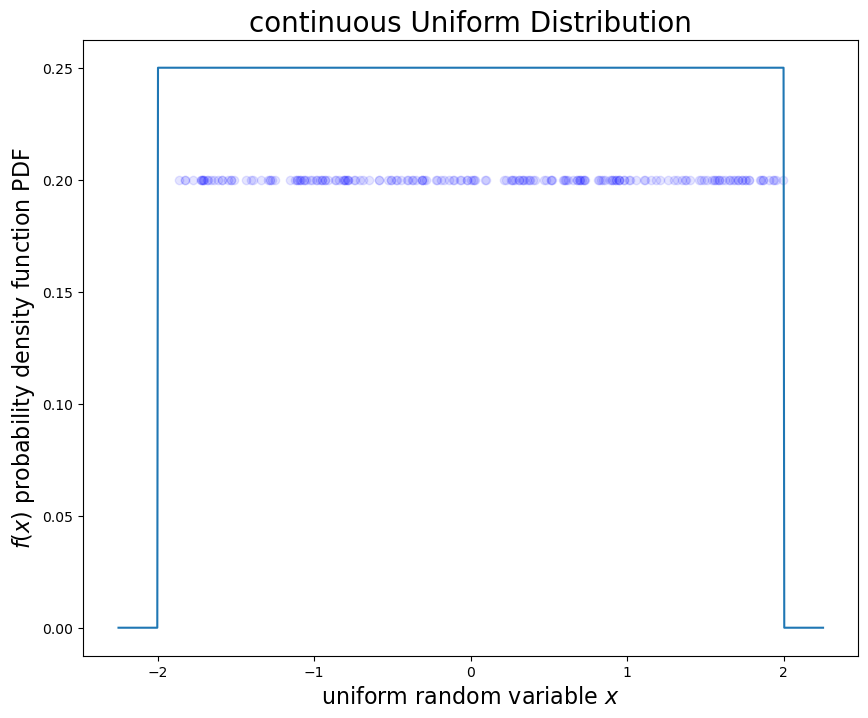

In [56]:
NUM_SAMPLES = 200
samples = f.rvs(NUM_SAMPLES)

plt.plot(samples, np.ones(NUM_SAMPLES)*0.2, 'bo', alpha=0.1)

x = np.linspace(-2.25, 2.25, 1000)
plt.plot(x, f.pdf(x));
plt.xlabel('uniform random variable $x$', fontsize=16);
plt.ylabel('$f(x)$ probability density function PDF', fontsize=16);
plt.title('continuous Uniform Distribution', fontsize=20);


## Normal Distribution

The normal distribution (also known as the Gaussian distribution and also as a bell curve) is arguably the most
important probability distribution to be familiar with among both discrete and continuous distributions.
The probability density function of a continuous normal random variable $X$ with a mean $\mu$ and a variance $\sigma^2$
is given by:

\begin{equation}
n(x; \mu, \sigma) = \frac{1}{ \sqrt{2 \pi \sigma} } e^{- \frac{1}{2 \sigma^2} (x - \mu)^2 }
\end{equation}

The normal distribution has the following properties:

1. The mode, which is the point on the horizontal axis where the curve is a maximum, occurs at
   $x = \mu$
2. The curve is symmetric about a vertical axis through the mean $\mu$
3. The curve has its points of inflection at $x = \mu \pm \sigma$; it is concave downward if
   $\mu - \sigma < X < \mu + \sigma$, and is concave upward otherwise.
4. The normal curve approaches the horizontal axis asymptotically as we proceed in either
   direction away from the mean.
5. The total area under the curve and above the horizontal axis is equal to 1.0

The last property is the most important here.  The normal distribution is a proper continuous
probability distribution because the equation defining the density function sums up to 1.0
under the curve.  By 1 we see that the density function will be at the maximum value 
at the location $\mu$, which is the mean of the normal distribution.  The normal distribution
never actually reaches a density of 0.0.  As you go towards $-\infty$ and $+\infty$ it approaches
0, but never actually reaches it, though the total sum of the area under the curve is one when
you integrate over the whole interval from $[-\infty, \infty]$

Lets look at some examples of normal distributions.  First we will jump right to using `scipy.stats`
distribution object for the uniform distribution.  Lets plot a standard normal distribution, and
ensure that the sum of the area under the distribution is indeed 1.  A standard normal
distribution is a normal distribution that has a mean $\mu = 0$ and a standard deviation $\sigma = 1$.

In [57]:
# mean and standard deviation of normal distribution are metaparameters defining the shape
mu = 0.0
sigma = 1.0

# the default when creating a normal distribution from scipy.stats is to create a standard
# normal distribution with mu=0 and sigma=1, so we don't really have to pass in the
# metaparameters here if we want a standard normal distribution, we are given one by default
from scipy.stats import norm

n = norm(mu, sigma)

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2887/793170838.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, n.pdf(x), 'b-', label='standard normal distribution $\mu=0, \sigma=1$')


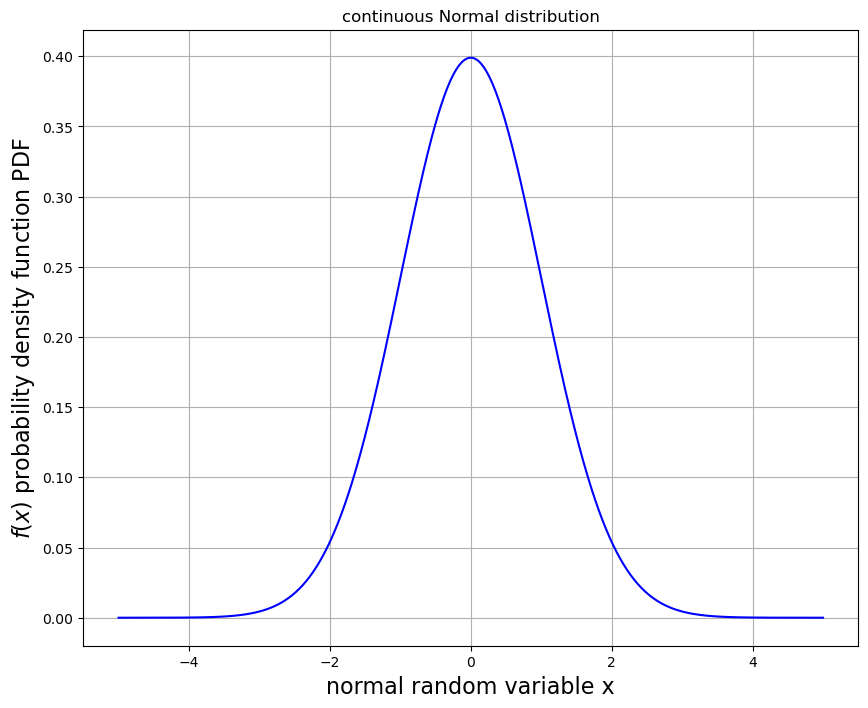

In [58]:
# display the normal distribution
x = np.linspace(-5.0, 5.0, 1000)
plt.plot(x, n.pdf(x), 'b-', label='standard normal distribution $\mu=0, \sigma=1$')
plt.grid();
plt.xlabel('normal random variable x', fontsize=16);
plt.ylabel('$f(x)$ probability density function PDF', fontsize=16);
plt.title('continuous Normal distribution');

Notice that the pdf is at its maximum at the mean where here the mean is $\mu = 0$.  The density
function is symetric around the x axis at 0.  And as mentioned, there are inflection points
at -1 and 1, where $\sigma = 1$.  This means this is the location where the slope of the function
changes from getting bigger to starting to get smaller (or vise-versa). 

It is not immediately obvious that the area of the density function adds up to 1.  The box
that contains most of the area of the function from -2 to 2 has a height of 0.4, given an area
of 1.6, but the function probably occupies around only 1/2 of that area.

If we integrate the normal density function, we need to do it from $-\infty$ to $\infty$ since
as we noted the function never actually completely reaches 0, even when we are many
standard deviations away from the mean.

In [59]:
integrate(n.pdf, -np.infty, np.infty)

(0.9999999999999998, 1.0178191320905743e-08)

The sum does appear to be 1.0 for the density function, as we would expect.

You can have other types of normal distributions other than the standard normal one.  Lets look at one with
a mean $\mu = 5$ and a standard deviation $\sigma = 0.4$

In [60]:
# mean and standard deviation of normal distribution are metaparameters defining the shape
mu = 5.0
sigma = 0.4

# normal distribution with a mean of 5 and sigma of 0.4
n5 = norm(mu, sigma)

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2887/1421877309.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, n.pdf(x), 'b-', label='standard normal distribution $\mu=0, \sigma=1$')
/tmp/ipykernel_2887/1421877309.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, n5.pdf(x), 'g-', label='normal distribution $\mu=5, \sigma=0.4$')


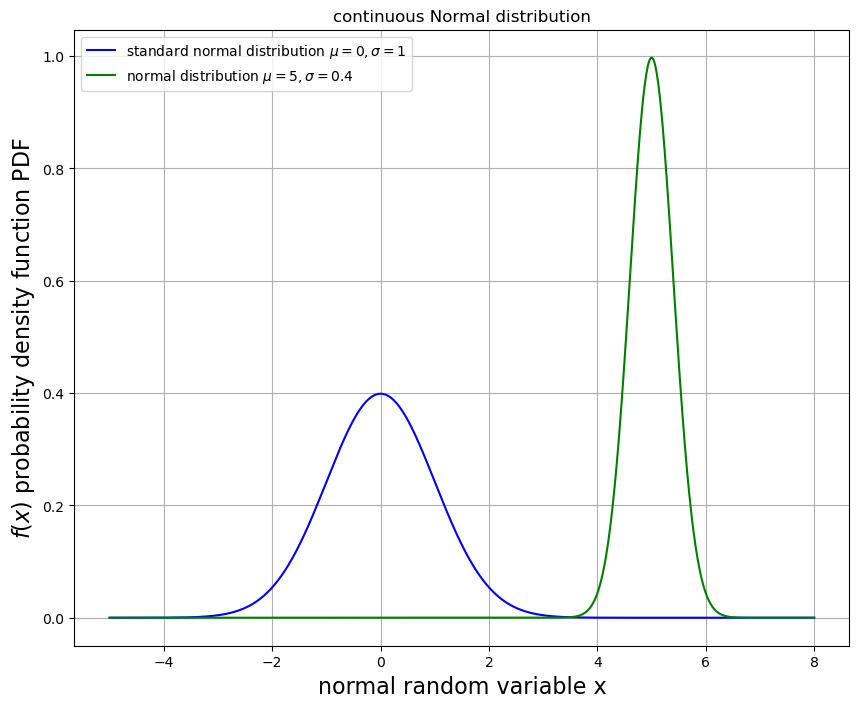

In [61]:
# display and compare the normal distribution
x = np.linspace(-5.0, 8.0, 1000)
plt.plot(x, n.pdf(x), 'b-', label='standard normal distribution $\mu=0, \sigma=1$')
plt.plot(x, n5.pdf(x), 'g-', label='normal distribution $\mu=5, \sigma=0.4$')
plt.grid();
plt.xlabel('normal random variable x', fontsize=16);
plt.ylabel('$f(x)$ probability density function PDF', fontsize=16);
plt.legend();
plt.title('continuous Normal distribution');

Notice what happens as we change the mean and standard deviation of the normal distribution.  As you
see the new distribution is centered at $x = 5$, the location of the mean of the density
function.  Also since we selected a standard deviation that is smaller than 1, the density
function is more concentrated, and you see the maximum of the density function raises higher
then the standard normal distribution.  The inflection points for this distribution
will be at $\mu \pm \sigma = 5.0 \pm 0.4 = 4.6,5.4$

Lets add one more, to show what happens if the standard deviation is more than 1.  Can you predict
what should happen if the standard deviation is larger than 1?

In [62]:
# mean and standard deviation of normal distribution are metaparameters defining the shape
mu = -2.0
sigma = 2.2

# normal distribution with a mean of -2 and sigma of 2.2
nneg2 = norm(mu, sigma)

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2887/2563468583.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, n.pdf(x), 'b-', label='standard normal distribution $\mu=0, \sigma=1$')
/tmp/ipykernel_2887/2563468583.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, n5.pdf(x), 'g-', label='normal distribution $\mu=5, \sigma=0.4$')
/tmp/ipykernel_2887/2563468583.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, nneg2.pdf(x), 'r-', label='normal distribution $\mu=-2, \sigma=2.2$')


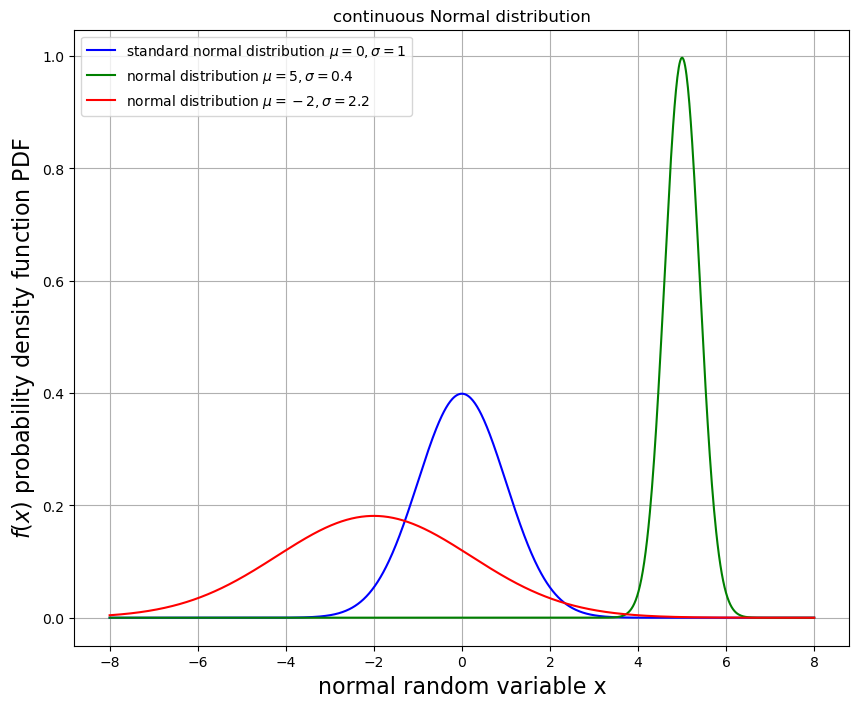

In [63]:
# display and compare the normal distribution
x = np.linspace(-8.0, 8.0, 1000)
plt.plot(x, n.pdf(x), 'b-', label='standard normal distribution $\mu=0, \sigma=1$')
plt.plot(x, n5.pdf(x), 'g-', label='normal distribution $\mu=5, \sigma=0.4$')
plt.plot(x, nneg2.pdf(x), 'r-', label='normal distribution $\mu=-2, \sigma=2.2$')
plt.grid();
plt.xlabel('normal random variable x', fontsize=16);
plt.ylabel('$f(x)$ probability density function PDF', fontsize=16);
plt.legend();
plt.title('continuous Normal distribution');

In [64]:
# confirm however that both of the new distributions have a density function that sums up to 1.0
print(integrate(n5.pdf, -np.infty, np.infty))
print(integrate(nneg2.pdf, -np.infty, np.infty))


(1.0000000000000002, 5.8908001353052005e-09)
(1.0, 1.1669420262022477e-08)


Before we move on to using normal distributions to do calculations, lets recall the concept of the cumulative
distribution function (CDF).  We can show the CDF for the standard normal distribution easily enough.  The
`scipy.stats` probability distribution objects have `.cdf()` function foc computing cumulative densities:

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2887/2893851280.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, n.pdf(x), 'b-', label='standard normal distribution $\mu=0, \sigma=1$')
/tmp/ipykernel_2887/2893851280.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, n.cdf(x), 'g-', label='cumulative density function CDF $\mu=0, \sigma=1$')


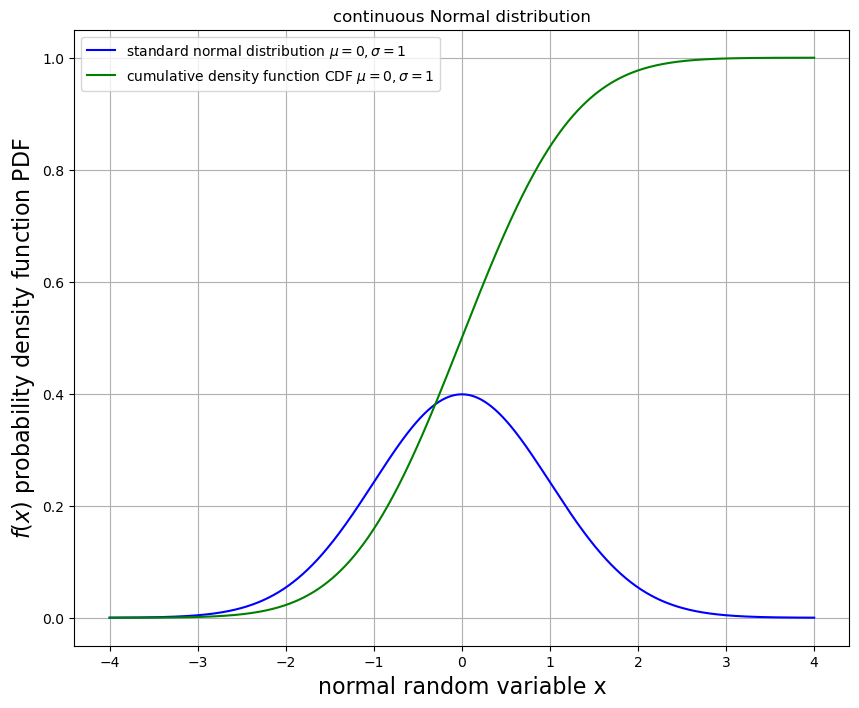

In [65]:
# display and compare the pdf with the cumulative cdf for a standard normal
x = np.linspace(-4.0, 4.0, 1000)
plt.plot(x, n.pdf(x), 'b-', label='standard normal distribution $\mu=0, \sigma=1$')
plt.plot(x, n.cdf(x), 'g-', label='cumulative density function CDF $\mu=0, \sigma=1$')
plt.grid();
plt.xlabel('normal random variable x', fontsize=16);
plt.ylabel('$f(x)$ probability density function PDF', fontsize=16);
plt.legend();
plt.title('continuous Normal distribution');

One use of the CDF is to determine the probabilities for continuous probability distributions.  For example, if
we wanted to know what the probability is that a random value is between $\pm \sigma$ (plus or minus 1 standard
devation from the mean), we could integrate the normal pdf function from -1 to 1 to find this probability:

In [66]:
integrate(n.pdf, -1.0, 1.0)

(0.682689492137086, 7.579375928402476e-15)

So this tells us that a bit more than 68% of the density is between -1 and 1 standard deviation from the mean, or in
other words for a standard normal distribution, there is a 68% chance the random variable x sampled from the
distribution will have a value in the range from -1.0 to 1.0.

We can use the cumulative density function CDF to calculate this as well.  The difference of the
cumulative density at the end of the interval from the beginning, $F(1.0) - F(-1.0)$ gives
the same calculation we just did:

In [67]:
n.cdf(1.0) - n.cdf(-1.0)

0.6826894921370859

### Calculating probabilities using normal distributions

**Example 1: using normal distributions**

Lets calculate some properties of the heights of men and women.  The heights of
people are known to be distributed according to a normal distribution.  According to some gathered data, the average
height of men is 70 inches with a standard deviation of 4 inches.  Women are on average shorter with an
average height of 66 inches and a standard deviation of 3 inches.  Lets visualize these
two population's distributions:

In [68]:
# define normal distribution random variables for the men and women populations
men_mu = 70
men_sigma = 4
men = norm(men_mu, men_sigma)

women_mu = 66
women_sigma = 3
women = norm(women_mu, women_sigma)

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2887/2418147350.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, men.pdf(x), 'b-', label='men $\mu=%0.1f, \sigma=%0.1f$' % (men_mu, men_sigma))
/tmp/ipykernel_2887/2418147350.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, women.pdf(x), 'r-', label='women $\mu=%0.1f, \sigma=%0.1f$' % (women_mu, women_sigma))


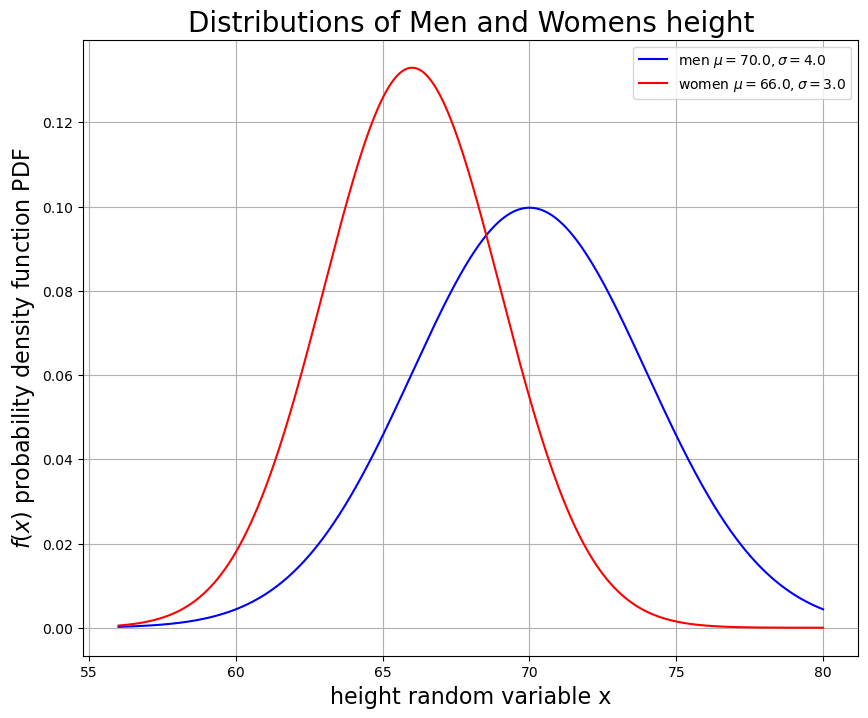

In [69]:
# display and compare the pdf for the 2 populations
x = np.linspace(56, 80, 1000)
plt.plot(x, men.pdf(x), 'b-', label='men $\mu=%0.1f, \sigma=%0.1f$' % (men_mu, men_sigma))
plt.plot(x, women.pdf(x), 'r-', label='women $\mu=%0.1f, \sigma=%0.1f$' % (women_mu, women_sigma))
plt.grid();
plt.xlabel('height random variable x', fontsize=16);
plt.ylabel('$f(x)$ probability density function PDF', fontsize=16);
plt.legend();
plt.title('Distributions of Men and Womens height', fontsize=20);

Lets start with some simple questions.

1. What is the probability that a man is smaller than 1 standard deviation from the average height?
2. What is the probability that a womain is larger than 70 inches?
3. What is the probability that a man is between 68 and 72 inches?
4. What is the probability that a randomly selected man will be taller than a randomly selected woman?

The next question requires us to be able to take the inverse of our probability density function.

5. What height are 90% of men shorter than.

This requires us to find the value of the random variable x whose cumulative density
is 0.9, or in other words the value of $x$ where 0.9 of the density is below it and 0.1
of the density is above it.  In `scipy.stats` probability distributions, the `.ppf()`
functions perform the reverse of the `.cdf()` function, or in other words we can use it
to answer quantile questions like this.

In [70]:
# 1) question is P(-infty <= x_man <= 66)
height = 66

# we could integrate the density function
print(integrate(men.pdf, -np.infty, height))

# we could use cumulative density functions, for a less than question, we simply
# need the cumulative density up to, by definition of the cumulative density
print(men.cdf(height))

(0.15865525393145707, 1.3648900518402269e-11)
0.15865525393145707


In [71]:
# 2) question P(70 <= x_woman <= infty)
height = 70

# we could integrate the density function to find answer
print(integrate(women.pdf, height, np.infty))

# but best to use the cumulative density function.  The cdf give probability < height, but
# the complement of this can be used to find answer to > height
print(1.0 - women.cdf(height))

(0.09121121972586789, 4.335684271539875e-11)
0.09121121972586788


In [72]:
# 3) question is P(68 <= x_man <= 72)

print(integrate(men.pdf, 68, 72))

print(men.cdf(72) - men.cdf(68))

(0.3829249225480263, 4.251320657156236e-15)
0.38292492254802624


In [73]:
# 4) question takes some interpretation.  Randomly selected woman will on average have average women height
#   thus one interpretation is simply the probability a man is larger than the average height of women
print(1.0 - men.cdf(women_mu))

0.8413447460685429


In [74]:
# 5) We can use the ppf function from scipy.stats to calculate quantils, or cutoff questions
x = men.ppf(0.90)
print(x)

# verify this, the cdf at this heigh should be 0.9
print(men.cdf(x))

75.1262062621784
0.8999999999999999


**Example 2: using normal distributions**

Lets look at a few examples of using normal distributions to answer questions about the probability of some
even occurring governed by that distribution.  

Given that we have a manufacturing process that creates ball bearings.  The manufacturing process is governed
by a normal distribution.  The ball bearings produced have a mean diameter of $\mu = 3.0$ cm and a standard
deviation of $\sigma = 0.005$.  

A quality control process is used to make sure the ball bearings are not too far out of spec of the
manufacturing process.  A ball is rejected from quality control if it is $\pm 0.01$ away from the mean.
Given this information, on average how many balls need to be scrapped because of the quality control
process described?

First of all, lets visualize what we want.  Basically we are given the shape of the normal distribution
governing this manufacturing practice.  The answer is equivalant to find the probabilities
$P(X < 2.99) + P(X > 3.01)$.  So we have the following:

In [75]:
# define normal distribution random variables for the manufacturing process
mu = 3.0
sigma = 0.005
balls = norm(mu, sigma)

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2887/2469913976.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, balls.pdf(x), 'b-', label='ball bearing process $\mu=%0.1f, \sigma=%0.3f$' % (mu, sigma))


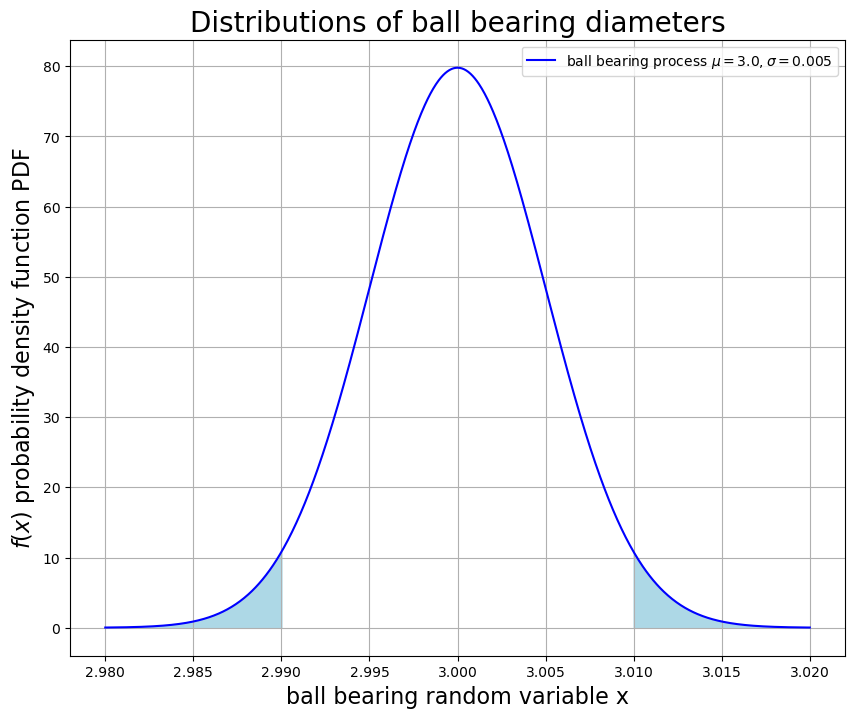

In [76]:
# display distribution and visualize the question/area being asked
x = np.linspace(2.98, 3.02, 1000)
plt.plot(x, balls.pdf(x), 'b-', label='ball bearing process $\mu=%0.1f, \sigma=%0.3f$' % (mu, sigma))

# visualize area/density of balls that fail quality control
x = np.linspace(2.98, 2.99, 100)
y1 = np.zeros(100)
y2 = balls.pdf(x)
plt.fill_between(x, y1, y2, color='lightblue')

x = np.linspace(3.01, 3.02, 100)
y2 = balls.pdf(x)
plt.fill_between(x, y1, y2, color='lightblue')

# add figure information
plt.grid();
plt.xlabel('ball bearing random variable x', fontsize=16);
plt.ylabel('$f(x)$ probability density function PDF', fontsize=16);
plt.legend();
plt.title('Distributions of ball bearing diameters', fontsize=20);

Basically the area under the density function that is less than 2.99 plus that that is greater than 3.01 will represent
the probability density of the balls that need to be rejected by quality control for being out of spec.

Since the normal distribution is symmetric, these two areas are equal, thus we can find the area of one of them
and multiply by 2:

In [77]:
# probability x < 2.99 can be found by the cdf directly
p = balls.cdf(2.99)

# the actual probability is 2 times this
print(2 * p)

0.04550026389636301


So there is a 4.5% chance a ball is in the shown area, or in other words we will have to throw a bit more than 4.5% of
the manufactured ball bearings for being out of spec.

If the manufacturer consdiers this too much waste, to what degree of precision would we need to get the manufacturing
process in order to lower the rejection rate to 1% or below?  This is a bit hard to answer, but we can search for
an answer.  For example, we could ask, if we were able to increase the manufacturing process quality so that the
standard deviation of the ball bearings was reduced to 0.004 would we then meet the required rejection
rate?

In [78]:
# The new manufacturing process is twice as precise, does this meet the the quality control goals?
mu = 3.0
sigma = 0.004
balls = norm(mu, sigma)

p = balls.cdf(2.99)
print(2 * p)

0.012419330651554126


So the answer is this isn't quite sufficient, but we are getting close.  If we could decrease the deviation by another 0.0005 we might just hit the target quality.

### Sampling from a normal random distribution

Lets confirm our results from the ball bearing question by performing a random simulation.

First of all, lets see if in fact we manufacture ball bearings using the original mean and standard deviation,
if we are seeing around a 4.5% rejection rate for quality.  Again, the `.rvs()` function can be used to
draw samples from the defined random distribution.

In [79]:
# define normal distribution random variables for the manufacturing process
mu = 3.0
sigma = 0.005
balls = norm(mu, sigma)

# the manufacturing quality tolerance is +/- 0.01 from the mean
tolerance = 0.01

# simulation parameters
NUM_TRIALS = 10000
rejects = 0
for trial in range(NUM_TRIALS):
    diameter = balls.rvs()
    if diameter < (mu - tolerance) or diameter > (mu + tolerance):
        rejects += 1
        
p = float(rejects) / float(NUM_TRIALS)
print('%d balls rejected out of %d manufactured, ratio: %0.8f' % (rejects, NUM_TRIALS, p))

441 balls rejected out of 10000 manufactured, ratio: 0.04410000


As a final point, it is possible to run simple simulations like this in a vectorized, and thus much
more computationally efficient way.  As we mentioned in passing, the `.rvs()` function is capable
of generating a whole numpy array of random samples.  We can use this fact to generate all of the
random samples simultaneously, then use vectorized operations to calculate the final simulation
results.

In [80]:
# define normal distribution random variables for the manufacturing process
mu = 3.0
sigma = 0.005
balls = norm(mu, sigma)

# the manufacturing quality tolerance is +/- 0.01 from the mean
tolerance = 0.01

# sample NUM_TRIALS balls from the random process, these are randomly generated ball diameters
# that are drawn from the defined manufacturing process normal distribution
NUM_TRIALS = 10000
diameters = balls.rvs(NUM_TRIALS)

# boolean array/result of which balls are out of tolerence, thus rejects
# we sum up each reject result indivually then add the 2 different reject realms
rejects = np.sum(diameters < (mu - tolerance)) + \
          np.sum(diameters > (mu + tolerance))

p = float(rejects) / float(NUM_TRIALS)
print('%d balls rejected out of %d manufactured, ratio: %0.8f' % (rejects, NUM_TRIALS, p))

443 balls rejected out of 10000 manufactured, ratio: 0.04430000


# Addendum

## Demonstration of density of drawing samples from a normal distribution

We demonstrated for the uniform distribution how, when we draw samples randomly from a uniform distribution,
they are uniformly spread through the interval of the distribution.

For any continuous distribution, you should be able to demonstrate the same thing.  It is a good exercise to
try this for a normal distribution, to really make sure you understand what it means to draw a random
sample from a continuous distribution. 

Lets just use a standard normal distribution to illustrate.  We will use the seaborn plotting library
scatter plot and density estimation abilities to demonstrate this. 

First of all lets draw a random sample of points from a standard normal distribution and plot them.

/tmp/ipykernel_2887/1552748448.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples, hist=True, rug=True);


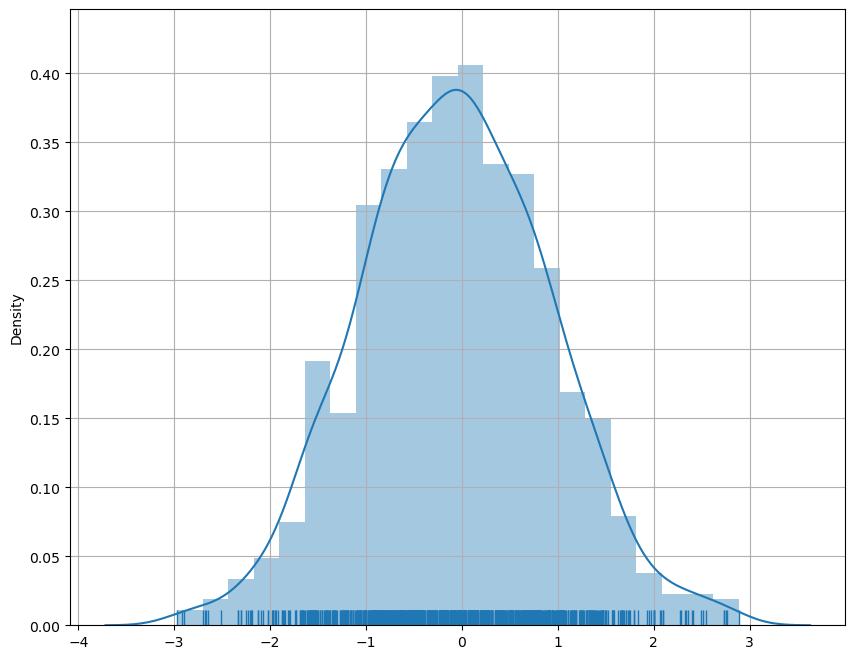

In [81]:
# define a standard normal distribution
mu = 0.0
sigma = 1.0
n = norm(mu, sigma)

# draw random samples
NUM_SAMPLES = 1000
samples = n.rvs(NUM_SAMPLES)

# visualize the resulting density of the random samples, using seaborn built in scatter plotting and density
# visualization capabilities
sns.distplot(samples, hist=True, rug=True);
plt.grid();

A few notes about this first figure.  By setting `hist=True` we cause the histogram to be drawn in light blue
on the graph.  A histogram is a discrete way of giving an estimate of the density of the sample points
we are showing.  By setting `rut=True` we actuall cause small dark blue ticks (or rugs) to be drawn at the bottom
of the graph.  We had 1000 samples so there should be 1000 rugs drawn at the bottom.  The rugs give a rough
idea of the density of where the samples were located, though the histogram gives a better idea.  As we would
expect for a standard normal distribution, most of the samples were close the $\mu$ the mean of our
standard normal distribution.  The dark blue line gives what is known as a density estimate
for the sample points we plotted.  It is related to and derived from something like calculating
the histogram.  You can think of this as the probability density function.  In this case, since the
sample points are a random sample, it is an estimate of the probability density functions (PDF) that
the points must have been drawn from.

As a final point, lets compare the estimated density function that seaborn determined with the true density
function of the standard normal distribution we actually sampled the points from.  When you sample random points
from a random distribution, you will never be able to exactly see the true shape of the distribution.  The
points are random, there is some variation, and this is expected.  But the more points you sample, the closer
your estimated distribution will come to the true pdf distribution you are sampling from.

/tmp/ipykernel_2887/349282902.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples, hist=True, rug=True, label='theoretical pdf');


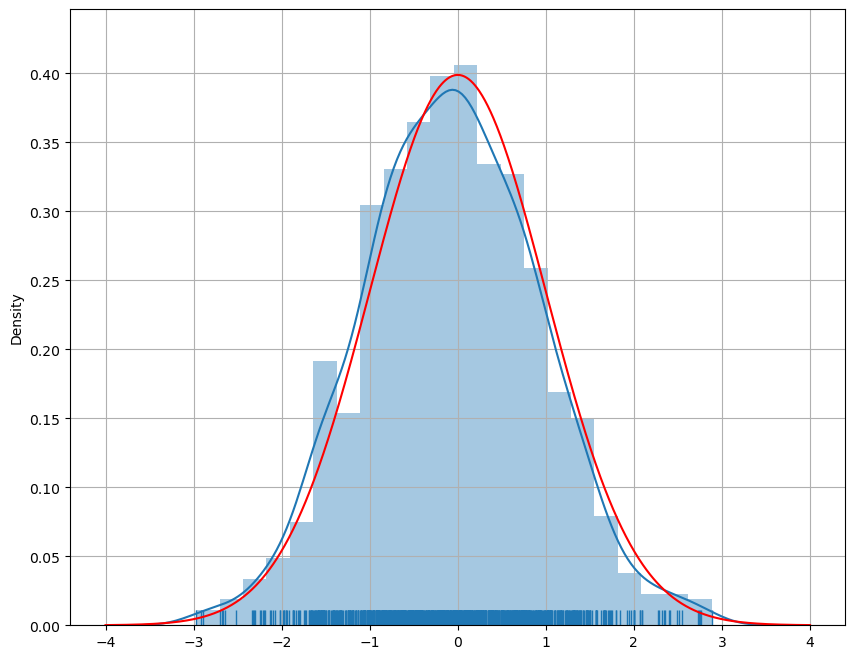

In [82]:
# visualize the resulting density of the random samples, using seaborn built in scatter plotting and density
# visualization capabilities
sns.distplot(samples, hist=True, rug=True, label='theoretical pdf');

# put the true pdf density function onto the estimated density plot
x = np.linspace(-4.0, 4.0, 1000, 'actual standard normal pdf')
plt.plot(x, n.pdf(x), 'r-')

plt.grid();
#plt.legend();

Usually for even 1000 samples, the estimate of the densify function will be quite good.  You can improve the
estimate of the underlying density function by increasing the samples.

But the point you should understand is, that when you sample points from a random distribution, a random number
is generated that is dictated by the probability density function of the probability distribution.  For a standard 
normal distribution, you are most likely to get a value close to 0 (the mean of the distribution).  The further
you get from the mean, the more unlikely you are to get a value.  If you rerun the previous 2 cells, you
may sometimes see a rug that is below -4 or greater than 4.  Values these extreme (4 standard deviations or more away
from the mean) are very unlikely to occur.  The probability of being less than 4 standard deviations away from the
mean is:

In [83]:
# probability of being more than 4 standard deviations lower than the mean
print('%0.8f' % n.cdf(-4.0))

# probability of being more than 2 standard deviations lower than the mean
print('%0.8f' % n.cdf(-2.0))

0.00003167
0.02275013


Or in other words there is a less than 3 in 100,000 chance of a value being less than -4 (or greater than 4).  So if
you only draw 1000 samples, you won't very often see such an extreme value.  But for comparison I showed the
probability of being 2 standard deviations lower than the mean.  There is over a 2% chance of this happening, meaning
you would expect to see 2 such points if you sample 100, and 20 such points if you sample 1000.

## Variation of repeated random experiments

The beginning of understanding the statistics of running experiments is understanding what you expect to see in terms
of the random variation you can expect from seeing 1 particular random sample from some random distribution.

First of all, when you take a random sample (or perform an experiment where you sample some number of items
at random from the population), you expect that the random sample you get will be goverend by, but not exaclty
the same as the true probability distribution you are sampling from.  If the true distribution is normally
distributed (which is often but not always true), then you expect that the mean of your sample will be representative
of the mean of the distribution you are sampling from, and the variance or standard deviation of your sample will
likewise give you some information about the variance of the process you are sampling from.

So for example, lets try creating experiments where we draw $10, 100, and 1000$ random samples from the ball bearing
manufacuring process normal distribution.  If we calculate the mean and the variance of the samples we draw, we
can compare the implied distributions from our sampled data with the true distribution of the underlying process.

Recall that the true probability of a ball being rejected is $P(X < 2.99) + P(X > 3.01) \approx 0.04550026389636301$

We expect that each time we run the experiment, that the result would should be close to, but not exaclty
equal to, the true probability.

What if we could repeat the experiment 100 times and plot the distribution of the results?  We would expect
that the mean of repeating this experiment over and over would be a much better estimate of the true
mean of the rejection rate for the underlying unknown process.

In [84]:
def simulate_ball_bearings_experiment(num_balls, mu=3.0, sigma=0.005):
    """Simulates manufacturing num_balls at random, where the diamater and variance.
    of the manufacturing process is governed by a normal distribution with a given mean diameter
    and standard deviation.  This function returns a single run of a simulated manufacture of the
    number of shown balls.
    """
    # our random variable to simulate manufacturing sampled ball bearings
    balls = norm(mu, sigma)
    
    # simulate manufacturing the asked for number of ball bearings
    diameters = balls.rvs(num_balls)
    
    # return the resulting manufactured diameters
    return diameters

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2887/741110114.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, balls.pdf(x), 'b-', label='ball bearing process $\mu=%0.1f, \sigma=%0.3f$' % (mu, sigma));


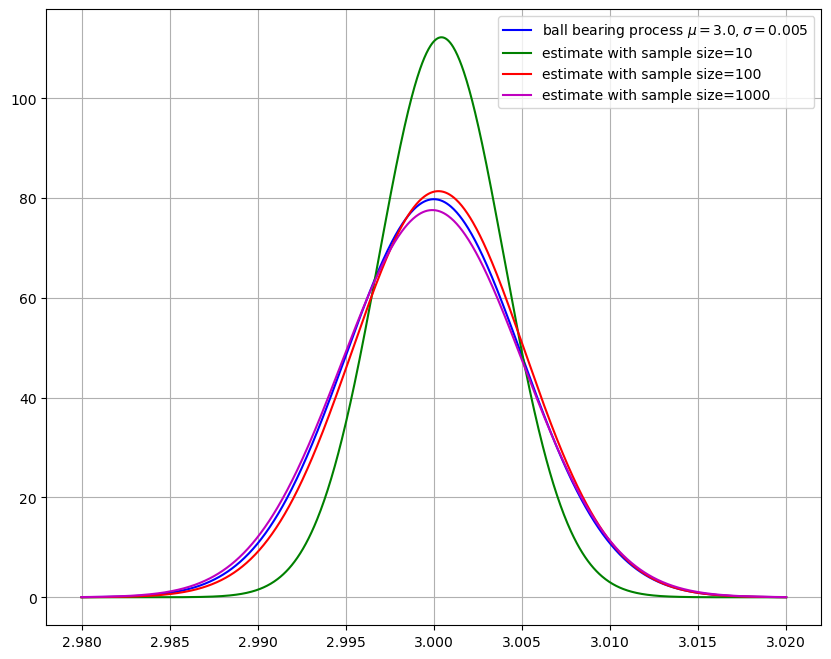

In [85]:
mu = 3.0
sigma = 0.005

# the true pdf of the continuous normal distribution
balls = norm(mu, sigma)

# visualize the true normal distribution
# display distribution and visualize the question/area being asked
x = np.linspace(2.98, 3.02, 1000)
plt.plot(x, balls.pdf(x), 'b-', label='ball bearing process $\mu=%0.1f, \sigma=%0.3f$' % (mu, sigma));
plt.grid();


# repeat the experiment, but with increasingly larger sample sizes
# and plot estimates of the true distribution using the mean and variance of the sample
sample10 = simulate_ball_bearings_experiment(10, mu, sigma)
mu10 = np.mean(sample10)
sigma10 = np.std(sample10)
balls10 = norm(mu10, sigma10)
plt.plot(x, balls10.pdf(x), 'g-', label='estimate with sample size=10')

sample100 = simulate_ball_bearings_experiment(100, mu, sigma)
mu100 = np.mean(sample100)
sigma100 = np.std(sample100)
balls100 = norm(mu100, sigma100)
plt.plot(x, balls100.pdf(x), 'r-', label='estimate with sample size=100')

sample1000 = simulate_ball_bearings_experiment(1000, mu, sigma)
mu1000 = np.mean(sample1000)
sigma1000 = np.std(sample1000)
balls1000 = norm(mu1000, sigma1000)
plt.plot(x, balls1000.pdf(x), 'm-', label='estimate with sample size=1000')

plt.legend();

You should see that, as the sample size increases, the estimate using the mean and variance of the sample becomes
better and better.  This is expected from what is known as the **central limit theorem**.  

Though it is beyond the scope of this discussion, from a sample of size $n$, we can use this
information, if we assume the underlying process is governed by a normal distribution, to
be able to put bounds on the possible true values of the mean (and standard deviation) that
we just sampled from.

For example, for a sample size of 10 (or 100, or 1000), we can estimate what is known as a 95% confidence interval
based on the sampled data of where the true mean must lie.  95% of the area under a sampled normal distribution
lies $\pm 1.96$ standard deviations away from the mean. Thus we can calulate a 95% lower and upper confidence
bounds using $n$ and the sampled mean and sampled standard deviation

\begin{equation}
\bar{x} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu <  \bar{x} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}}
\end{equation}

Here $\bar{x}$ is the mean of the sample, and $\sigma$ is the sample standard deviation from our sample of
size $n$.  The $z_{\alpha/2}$ expression represent the percential in order to get the 95% confidence interval.

In practice, this means we can use the sampled mean and sampled standard deviation from an experiment to calculate
a 95% confidence interval like this:

In [86]:
lower_bound = mu10 - 1.96 * (sigma10 / np.sqrt(10))
upper_bound = mu10 + 1.96 * (sigma10 / np.sqrt(10))
interval_length = upper_bound - lower_bound 
print('n = 10 (lower = %0.8f, upper = %0.8f) interval length = %0.8f' % (lower_bound, upper_bound, interval_length))
print('n = 10 mean estimate error = %0.8f' % (np.abs(mu10 - mu)))

n = 10 (lower = 2.99822912, upper = 3.00263515) interval length = 0.00440603
n = 10 mean estimate error = 0.00043213


Your results may vary, but even with a sample size of only 10 items, it is most likely that the 95% confidence interval
will contain the true mean of the process we are sampling from.  The real question here is how much variance or
uncertainity is in the experimental result.  You will likely see that with a sample size of 10 items, the 95% confidence
interval ranges from 2.99 to 3.01.

But lets calculate the 95% confidence interval estimate of the mean for samples of 100 and 1000 as well.

In [87]:
lower_bound = mu100 - 1.96 * (sigma100 / np.sqrt(100))
upper_bound = mu100 + 1.96 * (sigma100 / np.sqrt(100))
interval_length = upper_bound - lower_bound 
print('n = 100 (lower = %0.8f, upper = %0.8f) interval length = %0.8f' % (lower_bound, upper_bound, interval_length))
print('n = 100 mean estimate error = %0.8f' % (np.abs(mu100 - mu)))

lower_bound = mu1000 - 1.96 * (sigma1000 / np.sqrt(1000))
upper_bound = mu1000 + 1.96 * (sigma1000 / np.sqrt(1000))
interval_length = upper_bound - lower_bound 
print('n = 1000 (lower = %0.8f, upper = %0.8f) interval length = %0.8f' % (lower_bound, upper_bound, interval_length))
print('n = 1000 mean estimate error = %0.8f' % (np.abs(mu1000 - mu)))

n = 100 (lower = 2.99929768, upper = 3.00121893) interval length = 0.00192124
n = 100 mean estimate error = 0.00025831
n = 1000 (lower = 2.99959483, upper = 3.00023206) interval length = 0.00063723
n = 1000 mean estimate error = 0.00008655


This may not have been a great example to use since the variance for the underlying PDF is so small.  But you
should almost always see that all of the 95% confidence intervals contain the true mean of 3.0 in them.  But also
the estimates of the mean, and the length of the 95% confidince interval, will become much smaller and more
precise as we increase the sample size of $n$.